# Project:

#  Determining Patterns of Video Game Sales Success

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Data overview

In [2]:
games = pd.read_csv(r'C:\Users\exeve\Downloads\games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- It is necessary to change the data type of **Year_of_Release** to **'int'** (year is an integer) and **User_Score** from 'object' to **'float'** in order to be able to operate with values . **Critic_Score** should be changed to **'int'** since the range goes up to 100. If they wanted to give scores containing decimals, it would make more sense to use a scale up to 10.

In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10204,Snowboard Kids 2,N64,1999.0,Sports,0.09,0.02,0.00,0.00,NaN,NaN,NaN
7211,Child of Eden,PS3,2011.0,Shooter,0.09,0.10,0.00,0.04,81.0,7.8,E10+
565,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010.0,Puzzle,1.63,0.51,0.35,0.18,79.0,7.7,E
2622,Golden Sun: Dark Dawn,DS,2010.0,Role-Playing,0.51,0.09,0.13,0.05,79.0,8.1,E10+
2664,Maximo: Ghosts to Glory,PS2,2001.0,Platform,0.38,0.29,0.00,0.10,84.0,8.7,T
7826,Silent Hill HD Collection,X360,2012.0,Action,0.11,0.06,0.01,0.02,69.0,5.6,M
2143,Star Soldier,NES,1986.0,Shooter,0.32,0.06,0.57,0.01,NaN,NaN,NaN
8102,Batman: Vengeance,GBA,2001.0,Adventure,0.13,0.05,0.00,0.00,68.0,tbd,E
7430,Rumble Racing,PS2,2001.0,Racing,0.10,0.08,0.00,0.03,85.0,8.2,E
11527,SingStar Apres-Ski Party 2,PS3,2010.0,Misc,0.00,0.06,0.00,0.01,NaN,NaN,NaN


- Here, we can see that the user rating actually uses decimal values, but the critic rating does not (the decimal is always 0).

- The year of publication always has a decimal zero because the data type is float.

- **Let's look at each column separately:**

<Axes: >

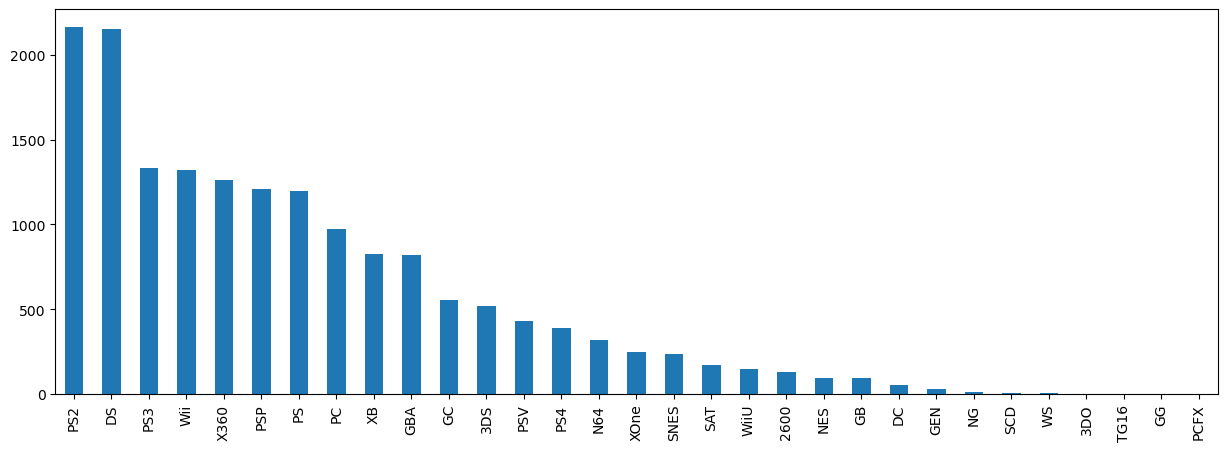

In [6]:
games['Platform'].value_counts().plot(kind='bar', figsize=(15,5))

<Axes: >

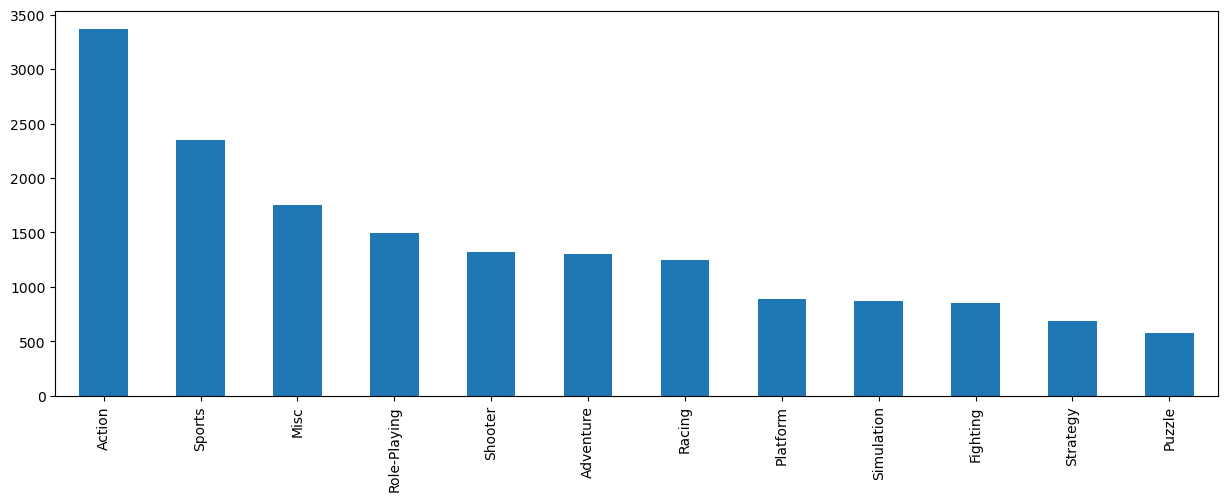

In [7]:
games['Genre'].value_counts().plot(kind='bar', figsize=(15,5))

<Axes: >

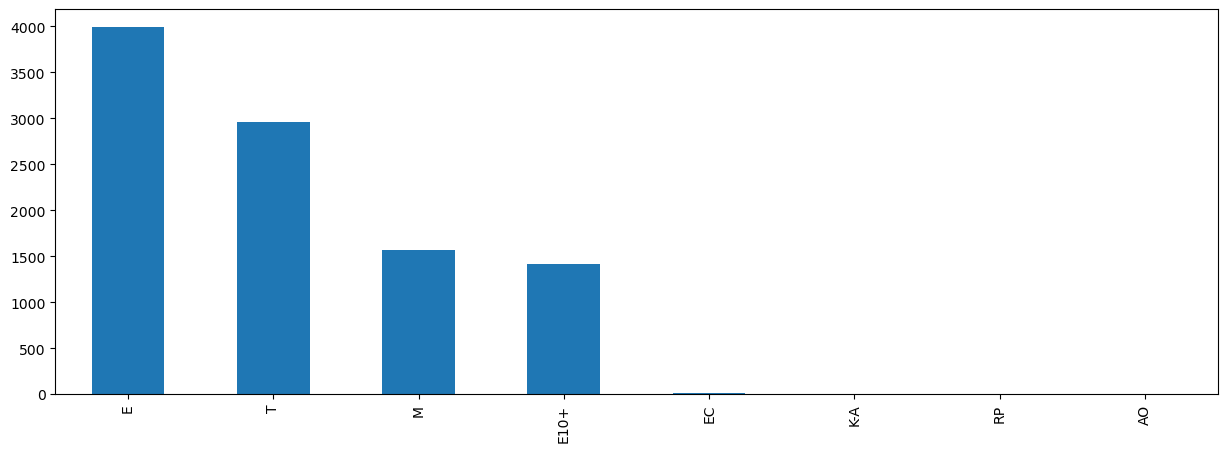

In [8]:
games['Rating'].value_counts().plot(kind='bar', figsize=(15,5))

EC - Early Childhood: The game is suitable for children aged 3 years and above and does not contain any material that parents might find inappropriate. Products receiving this rating are primarily designed for children and are usually educational games.

E - Everyone: The content is quite suitable for the age category from 6 years. Adults can also enjoy these games. Games with this rating may contain minimal violence, mostly of a cartoon nature. Originally K-A ("Kids to Adults");

E10+ - Everyone 10+ “For everyone 10 years and older”: Projects with this rating may contain either a little more cartoon or mild violence, or somewhat explicit scenes, or a minimal amount of blood.

T - Teen "Teenagers": The game is suitable for people over 13 years old. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, blood, or occasional use of profanity.

M - Mature "For adults": Game materials are not suitable for teenagers under 17 years of age. Projects with this rating may contain fairly brutal violence, large amounts of blood with dismemberment, obscene sexual scenes or gross profanity that is undesirable for younger audiences.

AO - Adults Only "For adults only": The contents of the game are only for adults over 18 years of age. Products in this category may contain prolonged scenes of intense violence and/or very explicit sexual content and nudity.

RP - Rating Pending: Rating is pending.

**Thus, the value of the K-A and EC ratings can simply be changed to E.**

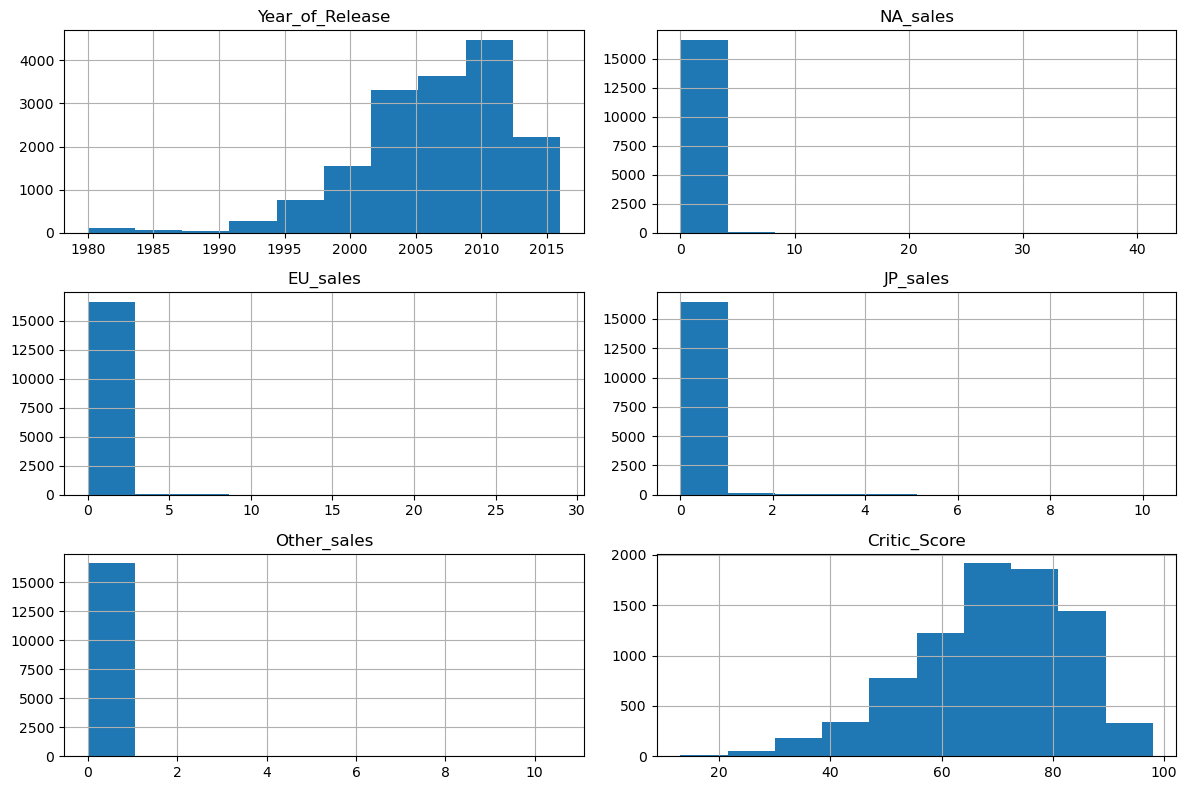

In [9]:
games.hist(bins =10, figsize = (12,8))
plt.tight_layout()

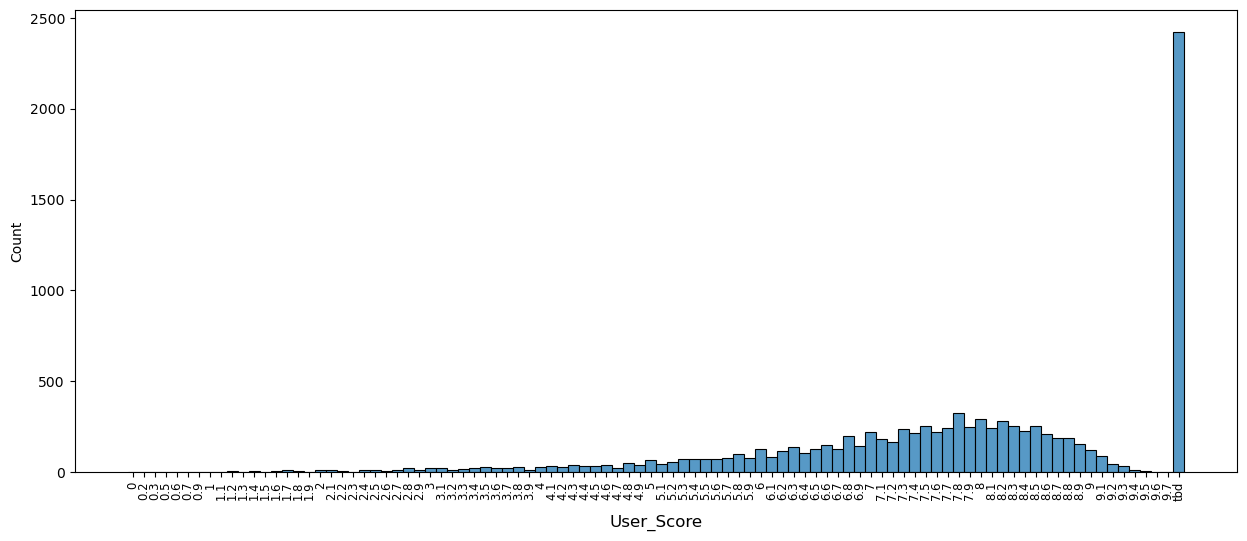

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(games['User_Score'].sort_values())
plt.xticks(rotation=90, size = 'small')
plt.xlabel('User_Score', labelpad = 10, size = 'large')
plt.show()

### Lowercasing the column names for convenience

In [11]:
games.columns = games.columns.str.lower()

### Checking for duplicates:

In [12]:
games.duplicated().sum()

0

In [13]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [14]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [15]:
games[['name', 'platform', 'year_of_release']].duplicated().sum()

0

### Checking for gaps:

In [16]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

### Gap percentage in each column:

In [17]:
def gaps(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Missing values %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('no gaps left  :)  ')

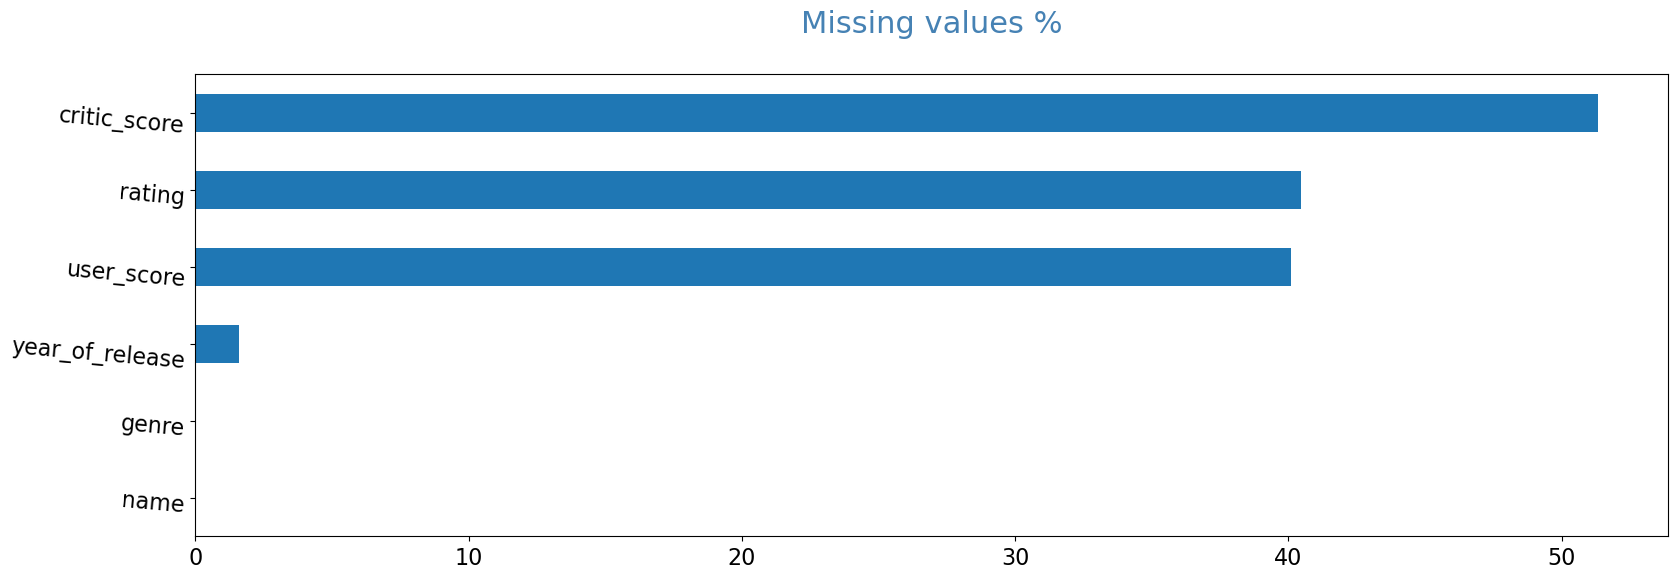

In [18]:
gaps(games)

- There is only one gap in the **'name'** column. Let's take a look at it:

In [19]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


- There is only one gap in the **'genre'** column too. Let's take a look at it:

In [20]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


- Both games are very old (1993) and have neither user nor critic ratings. We can do without them.

In [21]:
games = games.dropna(subset=['name','genre'])

- The percentage of **year_of_release** gaps is very small. **We can fill in the gaps with the average of the year of publication depending on the platform**. Since each platform is typical for a certain era.

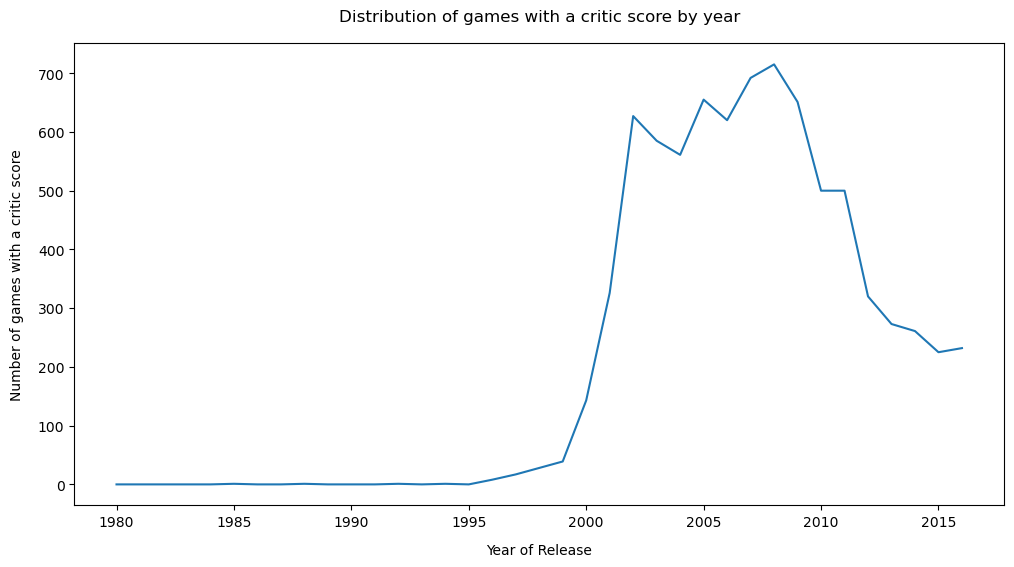

In [22]:
rpy = games.pivot_table(index='year_of_release', values='critic_score', aggfunc='count').sort_values(by='year_of_release')\
.plot(legend=False, figsize=(12,6))
plt.xlabel('Year of Release', labelpad=10)
plt.ylabel('Number of games with a critic score', labelpad=10)
plt.title('Distribution of games with a critic score by year', y=1.03)
plt.show()

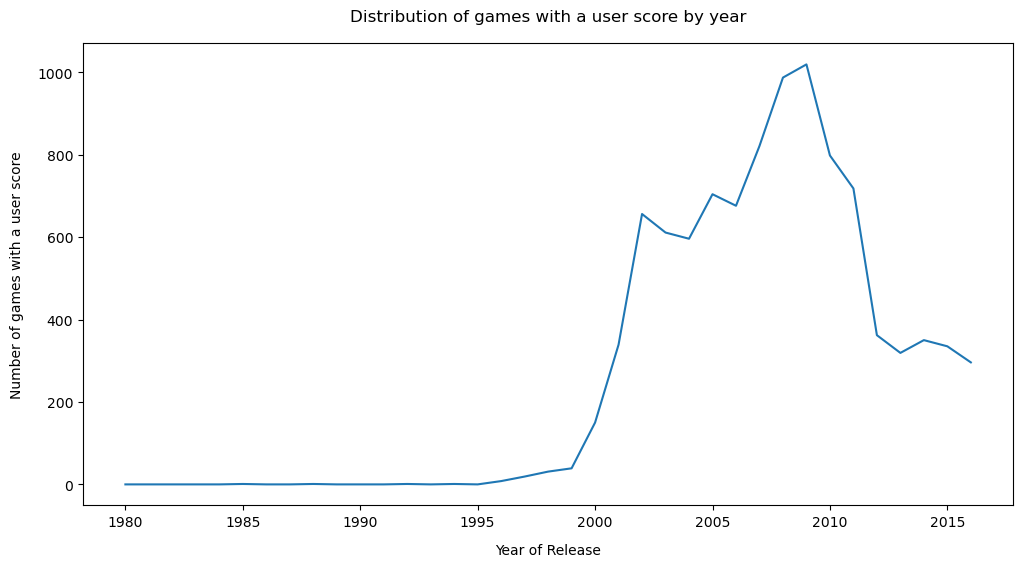

In [23]:
rpy = games.pivot_table(index='year_of_release', values='user_score', aggfunc='count').sort_values(by='year_of_release')\
.plot(legend=False, figsize=(12,6))
plt.xlabel('Year of Release', labelpad=10)
plt.ylabel('Number of games with a user score', labelpad=10)
plt.title('Distribution of games with a user score by year', y=1.03)
plt.show()

- The percentage of gaps in the critic_score and user_score columns is too high. It is possible that the data was not provided because it was unknown. In many cases, the same three features are null for the same game. In this case, it is better to leave this data as is without filling in the blanks.

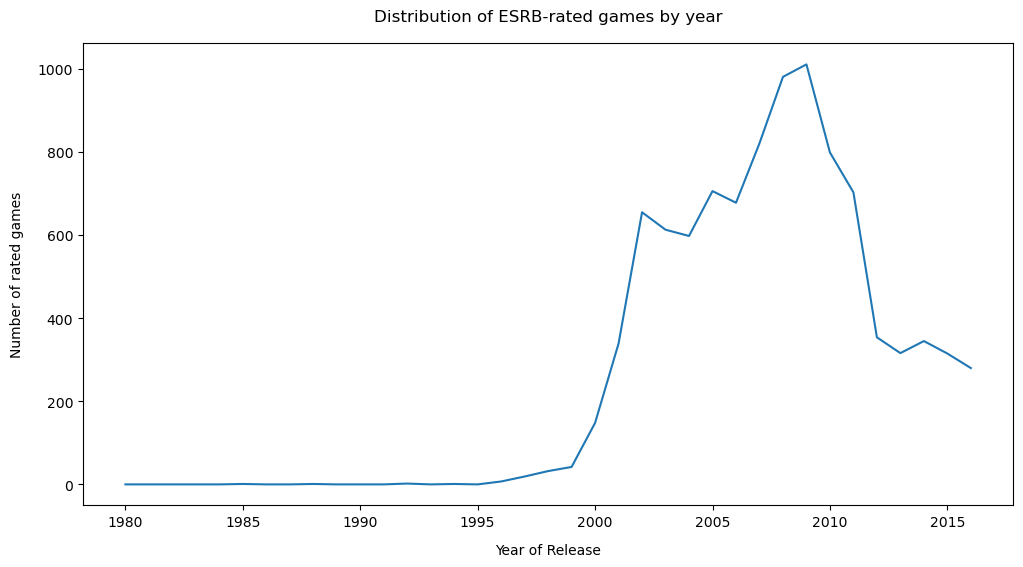

In [24]:
rpy = games.pivot_table(index='year_of_release', values='rating', aggfunc='count').sort_values(by='year_of_release')\
.plot(legend=False, figsize=(12,6))
plt.xlabel('Year of Release', labelpad=10)
plt.ylabel('Number of rated games', labelpad=10)
plt.title('Distribution of ESRB-rated games by year',y=1.03)
plt.show()

- Perhaps, games did not have an age rating before 1995. Since the rating data type is an "object", we can replace the gaps with "unrated".

An interesting fact is that all three parameters begin to increase since 1995, and previously they were close to zero.

### 'tbd' in the users score column:

In [25]:
(games['user_score'] == 'tbd').sum()

2424

- 'tbd' (to be determined) indicates that the score has not yet been determined. Given that it is the same as if there were no value at all, and that we use values that we do know to work with and draw conclusions from, we can turn all 'tbd' into NaN. Its meaning for us will therefore be the same.

# Data preprocessing

### Checking that the values in the ['rating','platform','genre','name'] columns are not repeated due to case.

In [26]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
# there are a lot of games, so we’ll just convert them to lowercase right away to avoid duplicates
games['name'] = games['name'].str.lower()

### Filling in the gaps

In [30]:
for p in games['platform'].unique():
    games.loc[(games['platform'] == p) & (games['year_of_release'].isna()), 'year_of_release'] = \
    games.loc[games['platform'] == p, 'year_of_release'].mean()
    

In [31]:
games['rating'] = games['rating'].fillna('unrated')

### Processing the rating column:

In [32]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'EC', 'rating'] = 'E'

### Changing data types:

In [33]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [34]:
games['critic_score'] = games['critic_score'].astype(float).astype('Int64')

In [35]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype(float)

### Checking that there are no gaps where there shouldn't be and that the data type is now correct:

In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB


In [37]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Let's sum up the total sales volume; it might be useful:

In [38]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [39]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int32  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(1), float64(6), int32(1), object(4)
memory usage: 1.6+ MB


# Exploratory data analysis

### Let's look at how many games were released per year:

In [40]:
games_per_year = games.pivot_table(index='year_of_release', values='name', aggfunc = 'count')

games_per_year = games_per_year.rename(columns={'name':'amount_of_games'})

games_per_year.sort_values(by='year_of_release', ascending=False)

,amount_of_games
year_of_release,
2016,502
2015,606
2014,582
2013,552
2012,652
2011,1136
2010,1280
2009,1456
2008,1524


### Displayed as a graph:

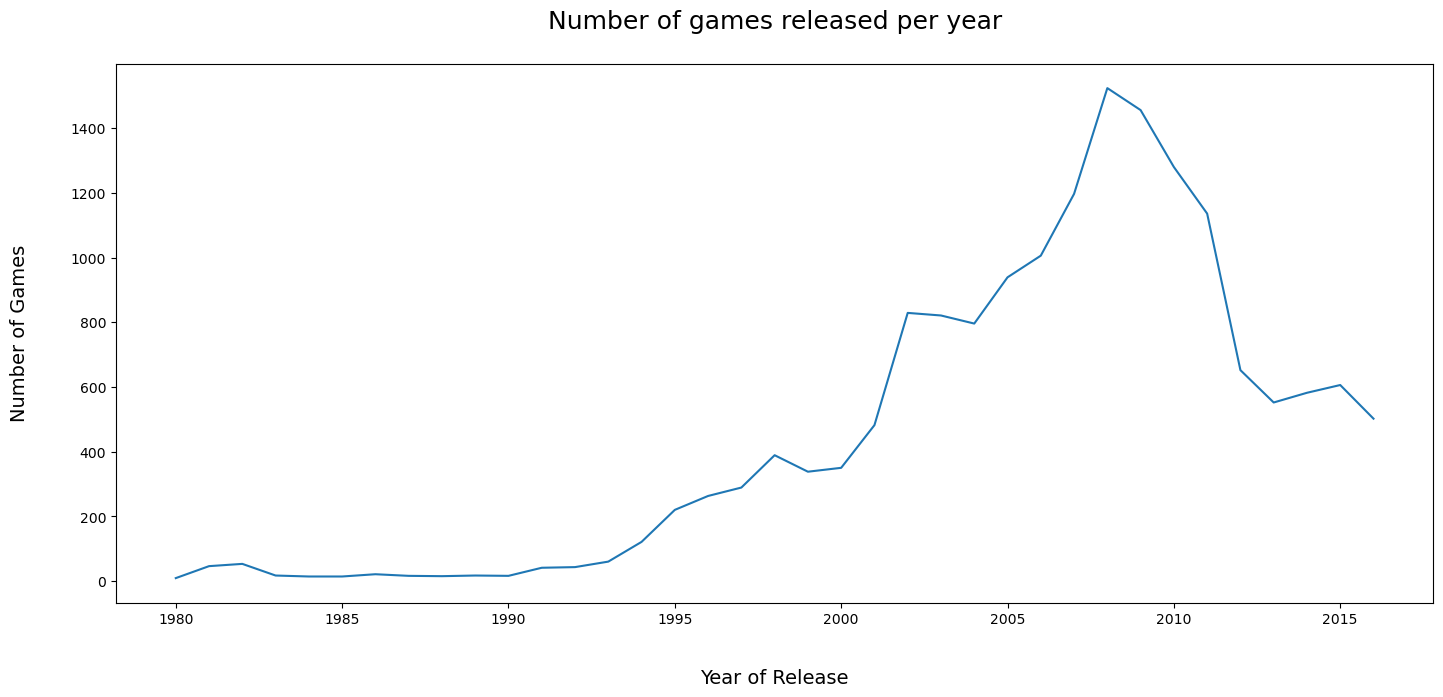

In [41]:
games_per_year_sorted = games_per_year.sort_values(by='year_of_release')
plt.figure(figsize=(17,7))
plt.plot(games_per_year_sorted)
plt.title('Number of games released per year', fontsize=18, y=1.05)
plt.xlabel('Year of Release', fontsize=14, labelpad = 30)
plt.ylabel('Number of Games', fontsize=14, labelpad=30)
plt.show()


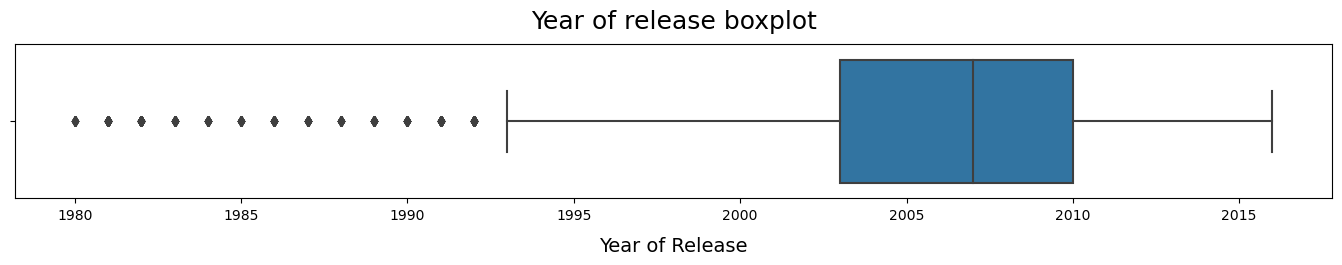

In [42]:
plt.subplots(figsize = (17,2))

plt.title('Year of release boxplot', y = 1.05, size = 18)

sns.boxplot(data=games, x = 'year_of_release')
plt.xlabel('Year of Release', labelpad = 10, size = 14)
plt.show()

- The more video games are released, the larger the sample for analysis. Beginning in 1994, a significant number of video games began to be released, and their amount grew every year until 2008. Around the same time, video games began to look more familiar to us today; this factor also affects the significance of the data. In addition, this is exactly the year of the Q2-1.5*IQR limit. So we can remove data up to this year.

In [43]:
games = games.query('year_of_release >= 1994')

### How sales have changed by platform over the years:

In [44]:
sales_per_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).\
index.tolist()

In [45]:
top_platforms = games[games['platform'].isin(sales_per_platform)]

In [46]:
tpg = top_platforms.pivot_table(index=['year_of_release','platform'], values='total_sales',aggfunc='sum')
tpg.sort_values(by=['year_of_release','total_sales'], ascending=False)


total_sales
year_of_release platform             
2016            PS4             69.25
                3DS             15.14
                PS3              3.60
                X360             1.52
                Wii              0.18
...                               ...
1998            PS             172.77
1997            PS             136.17
1996            PS              94.70
1995            PS              35.96
1994            PS               6.03

[96 rows x 1 columns]

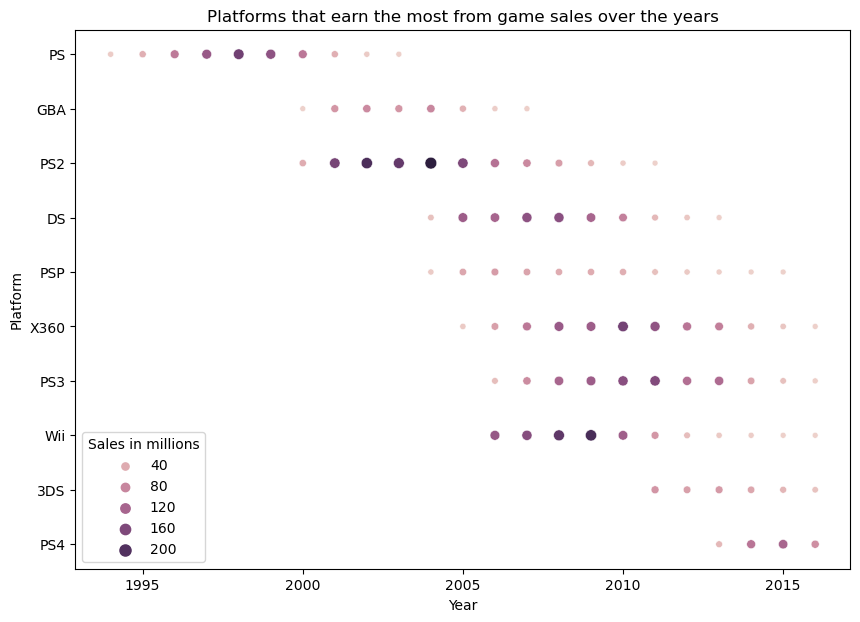

In [47]:
plt.figure(figsize=(10,7))
plt.ylabel('Platform')
plt.xlabel('Year')
plt.title('Platforms that earn the most from game sales over the years')
sns.scatterplot(data=tpg, x='year_of_release', y='platform', hue='total_sales', size='total_sales')
plt.legend(loc = 'lower left', title='Sales in millions')
plt.show()



- We see that platforms usually last a maximum of 12 years. The emergence of a new platform occurs on average 7-8 years after the appearance of the previous one, if we talk about platforms by manufacturer, and in general 6-7 years on average.
- As the current period, we will take the interval that runs from 2013 to the present. That year, the number of games released set the trend for subsequent years and the most relevant platforms were released to this day. From 2013 to 2016 this is 4 years. Therefore, we enter the range of time that platforms usually last and in which they are updated. So we will see platforms in decline and those on the rise.

In [48]:
games_current = games.query('year_of_release >= 2013')

### Let's have a look at the dynamics of video game sales by platform for this period (2012-2016):**

In [49]:
tpg2 = games_current.pivot_table(index=['year_of_release','platform'], values='total_sales',aggfunc='sum').sort_values(by=['year_of_release','total_sales'], ascending=False)
tpg2

total_sales
year_of_release platform             
2016            PS4             69.25
                XOne            26.15
                3DS             15.14
                PC               5.25
                WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18
2015            PS4            118.90
                XOne            60.14
                3DS             27.78
                PS3             16.82
                WiiU            16.35
                X360            11.96
                PC               8.52
                PSV              6.25
                Wii              1.14
                PSP              0.12
2014            PS4            100.00
                XOne            54.07
                PS3             47.76
                3DS             43.76
                X360            34.74
                WiiU            22.03
                PC              13.28
                PSV             12.16
                Wii              3.75
                PSP              0.24
2013            PS3            113.25
                X360            88.58
                3DS             57.76
                PS4             25.99
                WiiU            21.65
                XOne            18.96
                PC              12.38
                PSV             10.59
                Wii              8.59
                PSP              3.14
                DS               1.54

### Graphically:

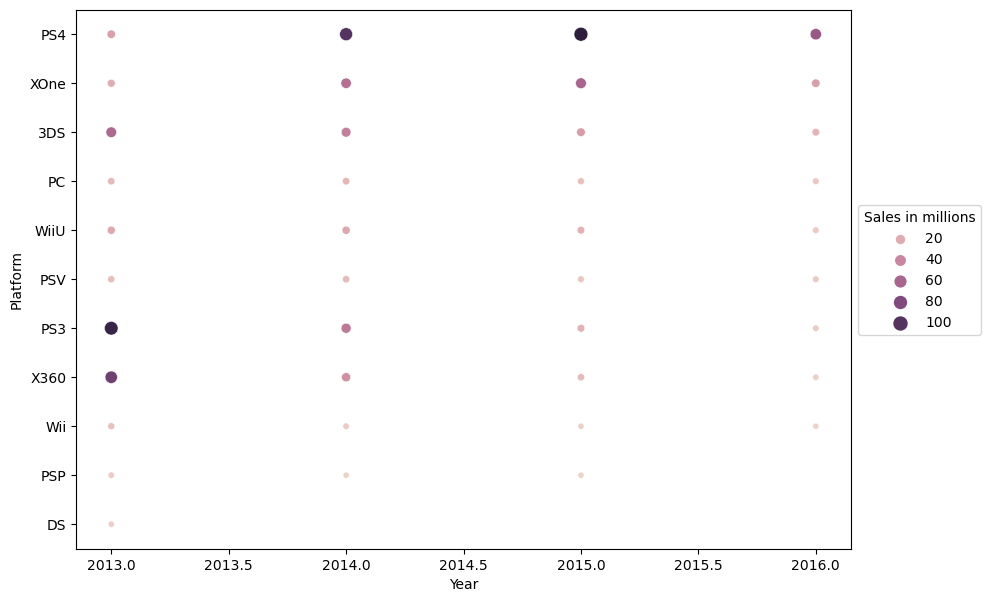

In [50]:
plt.figure(figsize=(10,7))
plt.ylabel('Platform')
plt.xlabel('Year')
sns.scatterplot(data=tpg2, x='year_of_release', y='platform', hue='total_sales', size='total_sales', sizes=(20,100))
plt.legend(loc = 'best', bbox_to_anchor = (1,0.65), title='Sales in millions')
plt.show()

In [51]:
games_current.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,0.801378
X360,0.735484
XOne,0.645020
Wii,0.593913
WiiU,0.562000
PS3,0.525884
3DS,0.464437
PC,0.208624
DS,0.192500


- The platforms with the highest volume of video game sales in the current period are **PS4, X360, XOne, Wii, WiiU and PS3**.
- But sales of the X360 and PS3 have been falling over the years, while sales of the XOne and PS4 have been growing. Also, the most current platforms are PS4 and XOne because this is just a generation change for the X360 and PS3. In the last year, sales of the latter were minimal, so we can consider that the generation change is complete and we cannot expect much sales potential from these platforms.
- In general, all platforms are in decline, but more so those that have existed for a longer time (from 5 years), perhaps there will soon be a generation change for these. 3DS, WiiU and PSV may still last a couple of years, but the rest can be forgotten.
- Sales of computer games in general have always remained uniform depending on the number of games released per year. This may be due to the fact that it is a platform that is not updated.
- **Thus, we will consider as platforms with sales potential: PS4, XOne, 3DS, PC, WiiU and PSV.**


### Let's create a DataFrame that contains data about the platforms with the greatest sales potential:

In [52]:
games_pot = games_current[games_current['platform'].isin(['PS4','XOne','3DS','PC','WiiU', 'PSV'])]

### Building a boxplot of global game sales by platform:

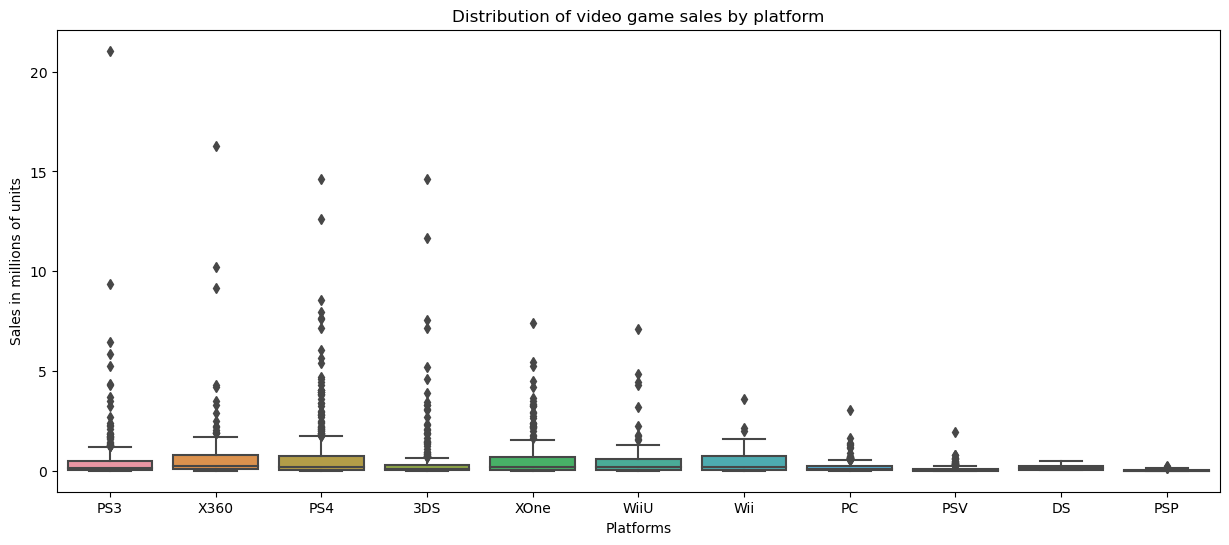

In [53]:
plt.figure(figsize=(15,6))
sns.boxplot(data=games_current, x='platform', y ='total_sales')


plt.ylabel('Sales in millions of units')
plt.xlabel('Platforms')
plt.title('Distribution of video game sales by platform')
plt.show()

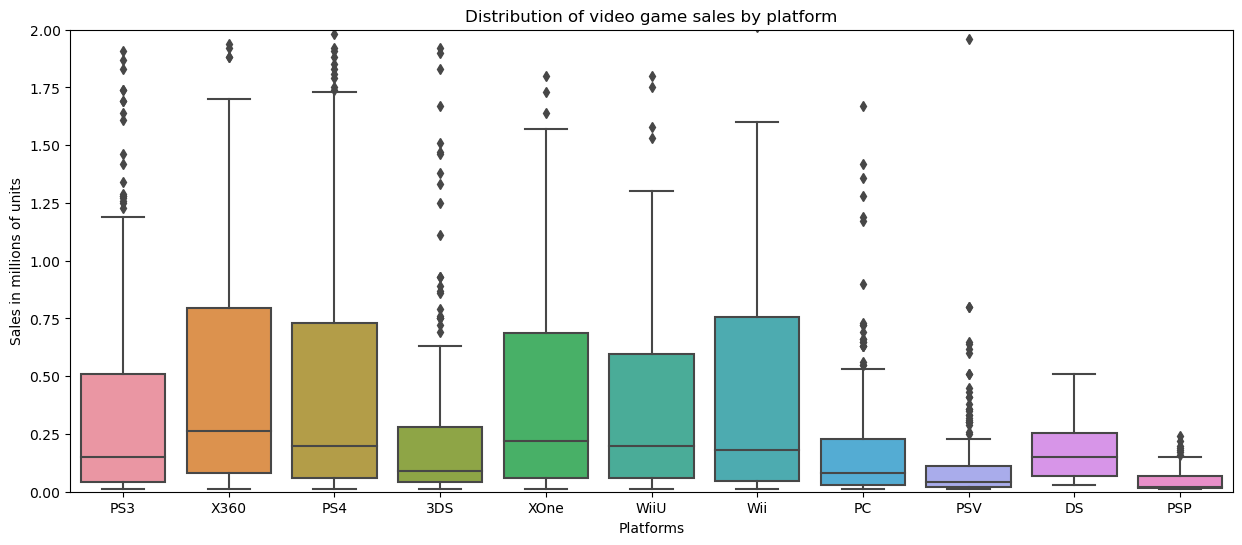

In [54]:
plt.figure(figsize=(15,6))
sns.boxplot(data=games_current, x='platform', y ='total_sales')

plt.ylim(0, 2)
plt.ylabel('Sales in millions of units')
plt.xlabel('Platforms')
plt.title('Distribution of video game sales by platform')
plt.show()

**In the chart, we can see how video game sales are distributed across each platform:**

- PS3:
     - 75%: 150.000-510.000 games sold
     - 25%: 40.000-150.000 games sold
- X360:
     - 75%: 265.000-795.000 games sold
     - 25%: 80.000-265.000 games sold
- PS4:
     - 75%: 200.000-730.000 games sold
     - 25%: 60,000-200,000 games sold
- XOne:
     - 75%: 220.000-685.000 games sold
     - 25%: 60,000-220,000 games sold
- 3DS:
     - 75%: 90.000-280.000 games sold
     - 25%: 40.000-90.000 games sold
- WiiU:
     - 75%: 200.000-595.000 games sold
     - 25%: 60,000-200,000 games sold
- Wii:
     - 75%: 180.000-755.000 games sold
     - 25%: 45.000-180.000 games sold
- PC:
     - 75%: 80,000-230,000 games sold
     - 25%: 30,000-80,000 games sold
- DS:
     - 75%: 150.000-252.000 games sold
     - 25%: 67.500-150.000 games sold
- PSV:
     - 75%: 40.000-110.000 games sold
     - 25%: 20,000-40,000 games sold
- PSP:
     - 75%: 20,000-70,000 games sold
     - 25%: 15,000-20,000 games sold

Thus, in the current period, the platforms which video games sell best on are X360, Wii, PS4, XOne and PS3.

**Every platform has games that can be considered best sellers that stand out and sell much better than most games. Let's see how many bestsellers there are on each platform. To do this, we will take video games whose sales exceed the limits of Q3+1.5*IQR of each platform:**

In [55]:
PS4_seller = games_current.loc[(games_current['platform'] == 'PS4') & (games_current['total_sales'] > 0.730), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the PS4 platform:',PS4_seller['name'].count())

PS3_seller = games_current.loc[(games_current['platform'] == 'PS3') & (games_current['total_sales'] > 0.510), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the PS3 platform:',PS3_seller['name'].count())

XOne_seller = games_current.loc[(games_current['platform'] == 'XOne') & (games_current['total_sales'] > 0.685), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the XOne platform:',XOne_seller['name'].count())


X360_seller = games_current.loc[(games_current['platform'] == 'X360') & (games_current['total_sales'] > 0.795), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the X360 platform:',X360_seller['name'].count())


DS3_seller = games_current.loc[(games_current['platform'] == '3DS') & (games_current['total_sales'] > 0.280), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the 3DS platform:',DS3_seller['name'].count())

DS_seller = games_current.loc[(games_current['platform'] == 'DS') & (games_current['total_sales'] > 0.252), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the DS platform:',DS_seller['name'].count())

WiiU_seller = games_current.loc[(games_current['platform'] == 'WiiU') & (games_current['total_sales'] > 0.595), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the WiiU platform:',WiiU_seller['name'].count())

Wii_seller = games_current.loc[(games_current['platform'] == 'Wii') & (games_current['total_sales'] > 0.755), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the Wii platform:',Wii_seller['name'].count())

PSV_seller = games_current.loc[(games_current['platform'] == 'PSV') & (games_current['total_sales'] > 0.11), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the PSV platform:',PSV_seller['name'].count())


PSP_seller = games_current.loc[(games_current['platform'] == 'PSP') & (games_current['total_sales'] > 0.07), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the PSP platform:',PSP_seller['name'].count())

PC_seller = games_current.loc[(games_current['platform'] == 'PC') & (games_current['total_sales'] > 0.230), \
                               ['platform','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers on the PC platform:',PC_seller['name'].count())



platform_seller = pd.concat([PS4_seller,
                        PS3_seller,
                        XOne_seller,
                        X360_seller,
                        DS3_seller,
                        DS_seller,
                        WiiU_seller,
                        Wii_seller, 
                        PSV_seller,
                        PSP_seller, 
                        PC_seller], 
                        axis = 1
                        )





Number of bestsellers on the PS4 platform: 97
Number of bestsellers on the PS3 platform: 85
Number of bestsellers on the XOne platform: 62
Number of bestsellers on the X360 platform: 47
Number of bestsellers on the 3DS platform: 77
Number of bestsellers on the DS platform: 2
Number of bestsellers on the WiiU platform: 29
Number of bestsellers on the Wii platform: 6
Number of bestsellers on the PSV platform: 81
Number of bestsellers on the PSP platform: 17
Number of bestsellers on the PC platform: 46


It can be seen that, logically, the platforms that become obsolete are those with the fewest bestsellers (DS, Wii, PSP).

### Top bestsellers by platform:

In [56]:
platform_seller.head(10)

,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales,platform,name,total_sales
0,PS4,call of duty: black ops 3,14.63,PS3,grand theft auto v,21.05,XOne,call of duty: black ops 3,7.39,X360,grand theft auto v,16.27,3DS,pokemon x/pokemon y,14.60,DS,frozen: olaf's quest,0.51,WiiU,mario kart 8,7.09,Wii,just dance 2014,3.58,PSV,minecraft,1.96,PSP,god eater 2,0.24,PC,the sims 4,3.05
1,PS4,grand theft auto v,12.62,PS3,call of duty: ghosts,9.36,XOne,grand theft auto v,5.47,X360,call of duty: ghosts,10.24,3DS,pokemon omega ruby/pokemon alpha sapphire,11.68,DS,lego marvel super heroes,0.38,WiiU,super smash bros. for wii u and 3ds,4.87,Wii,skylanders swap force,2.15,PSV,killzone: mercenary,0.80,PSP,sword art online: infinity moment,0.22,PC,starcraft ii: heart of the swarm,1.67
2,PS4,fifa 16,8.58,PS3,fifa 14,6.46,XOne,call of duty: advanced warfare,5.26,X360,minecraft,9.18,3DS,super smash bros. for wii u and 3ds,7.55,NaN,NaN,NaN,WiiU,splatoon,4.44,Wii,just dance 2015,2.01,PSV,final fantasy x / x-2 hd remaster,0.80,PSP,pro yaky? spirits 2013,0.20,PC,simcity (2013),1.42
3,PS4,star wars battlefront (2015),7.98,PS3,the last of us,5.86,XOne,halo 5: guardians,4.49,X360,call of duty: advanced warfare,4.28,3DS,pokemon sun/moon,7.14,NaN,NaN,NaN,WiiU,super mario 3d world,4.32,Wii,disney infinity,1.60,PSV,freedom wars,0.65,PSP,fifa 14,0.19,PC,battlefield 4,1.36
4,PS4,call of duty: advanced warfare,7.66,PS3,minecraft,5.27,XOne,fallout 4,4.22,X360,fifa 14,4.22,3DS,tomodachi life,5.22,NaN,NaN,NaN,WiiU,super mario maker,3.21,Wii,just dance 2016,0.95,PSV,borderlands 2,0.64,PSP,toukiden: the age of demons,0.18,PC,fallout 4,1.28
5,PS4,fifa 17,7.60,PS3,call of duty: advanced warfare,4.36,XOne,star wars battlefront (2015),3.66,X360,battlefield 4,3.49,3DS,luigi's mansion: dark moon,4.59,NaN,NaN,NaN,WiiU,new super luigi u,2.23,Wii,skylanders: trap team,0.95,PSV,tearaway,0.62,PSP,jikkyou powerful pro yakyuu 2013,0.17,PC,farming simulator 2015,1.19
6,PS4,fallout 4,7.17,PS3,fifa 15,4.28,XOne,assassin's creed: unity,3.50,X360,assassin's creed iv: black flag,3.31,3DS,monster hunter 4 ultimate,3.89,NaN,NaN,NaN,WiiU,the legend of zelda: the wind waker,1.80,NaN,NaN,NaN,PSV,fifa 15,0.60,PSP,pro evolution soccer 2014,0.16,PC,grand theft auto v,1.17
7,PS4,fifa 15,6.08,PS3,assassin's creed iv: black flag,3.71,XOne,destiny,3.37,X360,fifa 15,2.92,3DS,monster hunter 4,3.44,NaN,NaN,NaN,WiiU,wii party u,1.75,NaN,NaN,NaN,PSV,lego marvel super heroes,0.51,PSP,summon night 5,0.15,PC,the elder scrolls online,0.90
8,PS4,destiny,5.64,PS3,battlefield 4,3.49,XOne,gears of war: ultimate edition,3.28,X360,nba 2k14,2.52,3DS,monster hunter x,3.32,NaN,NaN,NaN,WiiU,mario party 10,1.58,NaN,NaN,NaN,PSV,soul sacrifice,0.51,PSP,7th dragon 2020-ii,0.13,PC,dragon age: inquisition,0.73
9,PS4,uncharted 4: a thief's end,5.39,PS3,gran turismo 6,3.23,XOne,fifa 16,3.25,X360,madden nfl 25,2.23,3DS,yokai watch 2 ganso/honke,3.28,NaN,NaN,NaN,WiiU,donkey kong country: tropical freeze,1.53,NaN,NaN,NaN,PSV,god eater 2,0.45,PSP,fate/extra ccc,0.12,PC,total war: rome ii,0.72


### How do reviews from users and critics affect sales within the popular PS4 platform?

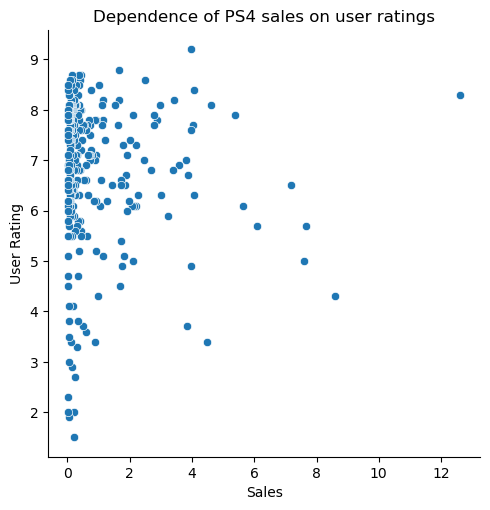

The correlation coefficient between PS4 platform user ratings and total sales is: -0.03


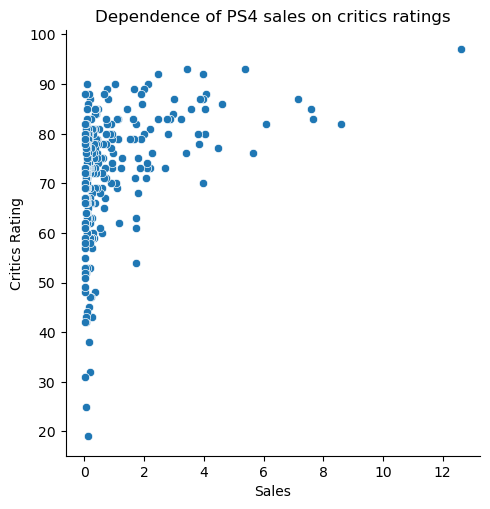

The correlation coefficient between critics ratings of the PS4 platform and total sales is: 0.41


In [100]:
games_PS4 = games_current.query('platform == "PS4"')


sns.relplot(x='total_sales', y='user_score',data=games_PS4)
plt.title('Dependence of PS4 sales on user ratings')
plt.xlabel('Sales')
plt.ylabel('User Rating')
plt.show()
print('The correlation coefficient between PS4 platform user ratings and total sales is:',\
      games_PS4['total_sales'].corr(games_PS4['user_score']).round(2))


sns.relplot(x='total_sales', y='critic_score',data=games_PS4)
plt.title('Dependence of PS4 sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics Rating')
plt.show()
print('The correlation coefficient between critics ratings of the PS4 platform and total sales is:',\
      games_PS4['total_sales'].corr(games_PS4['critic_score'].astype(float)).round(2))

### Let's compare the findings with game sales on other platforms:

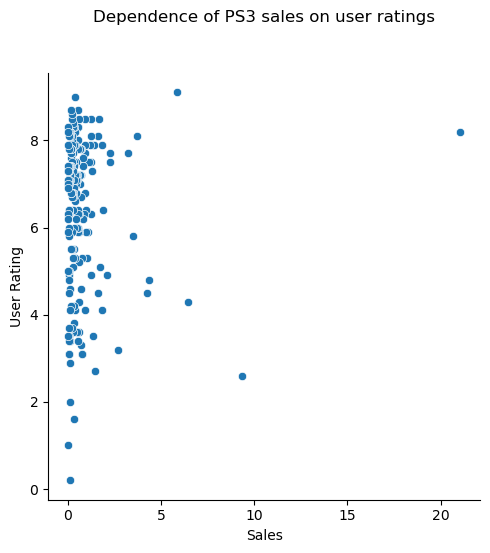

The correlation coefficient between user ratings of the PS3 platform and total sales is: 0.0


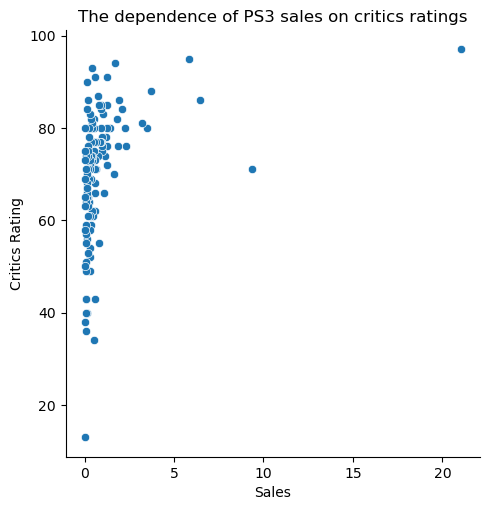

The correlation coefficient between critics ratings of the PS3 platform and total sales is: 0.33


In [101]:
games_PS3 = games_current.query('platform == "PS3"')



sns.relplot(x='total_sales', y='user_score',data=games_PS3)
plt.title('Dependence of PS3 sales on user ratings' ,y=1.1)
plt.xlabel('Sales')
plt.ylabel('User Rating')
plt.show()
print('The correlation coefficient between user ratings of the PS3 platform and total sales is:',\
      games_PS3['total_sales'].corr(games_PS3['user_score']).round(2))
sns.relplot(x='total_sales', y='critic_score',data=games_PS3)
plt.title('The dependence of PS3 sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics Rating')
plt.show()
print('The correlation coefficient between critics ratings of the PS3 platform and total sales is:',\
      games_PS3['total_sales'].corr(games_PS3['critic_score'].astype(float)).round(2))

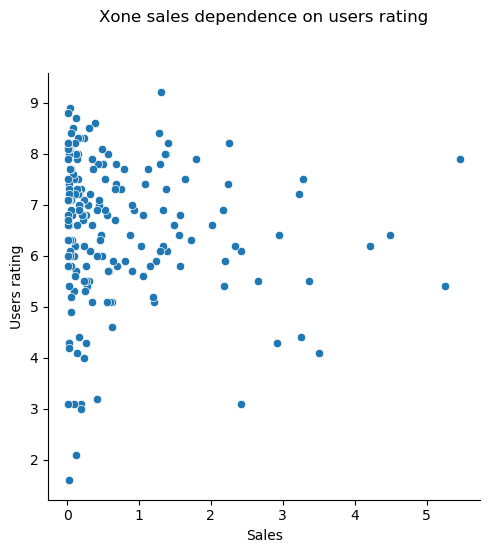

The correlation coefficient between user ratings of the XOne platform and total sales is: -0.07


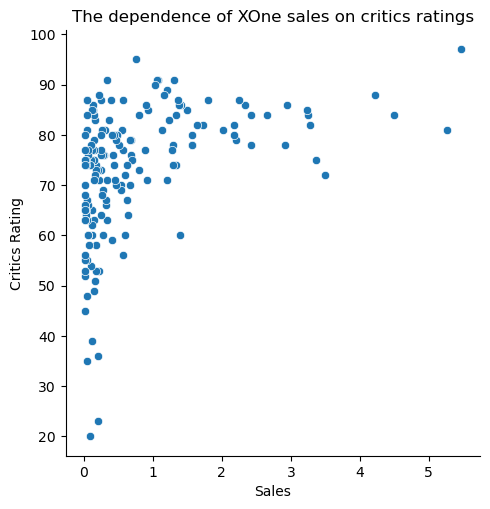

The correlation coefficient between critics ratings of the XOne platform and total sales is: 0.42


In [102]:
games_XOne = games_current.query('platform == "XOne"')



sns.relplot(x='total_sales', y='user_score',data=games_XOne)
plt.title('Xone sales dependence on users rating' ,y=1.1)
plt.xlabel('Sales')
plt.ylabel('Users rating')
plt.show()
print('The correlation coefficient between user ratings of the XOne platform and total sales is:',\
      games_XOne['total_sales'].corr(games_XOne['user_score']).round(2))
sns.relplot(x='total_sales', y='critic_score',data=games_XOne)
plt.title('The dependence of XOne sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics Rating')
plt.show()
print('The correlation coefficient between critics ratings of the XOne platform and total sales is:',\
      games_XOne['total_sales'].corr(games_XOne['critic_score'].astype(float)).round(2))

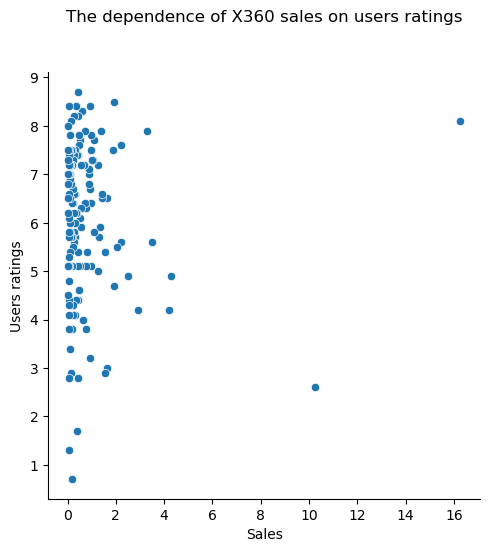

The correlation coefficient between user ratings of the X360 platform and total sales is: -0.01


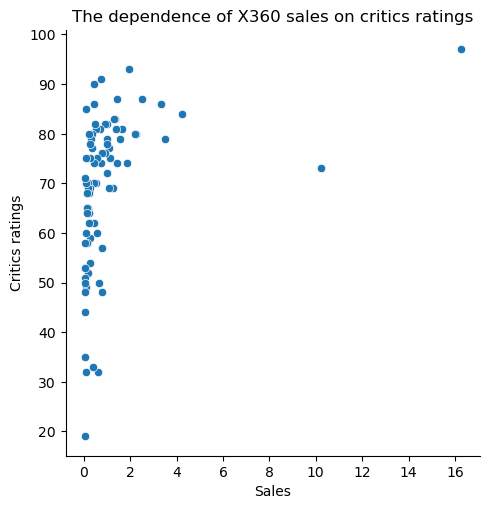

The correlation coefficient between critics ratings of the X360 platform and total sales is: 0.35


In [103]:
games_X360 = games_current.query('platform == "X360"')



sns.relplot(x='total_sales', y='user_score',data=games_X360)
plt.title('The dependence of X360 sales on users ratings' ,y=1.1)
plt.xlabel('Sales')
plt.ylabel('Users ratings')
plt.show()
print('The correlation coefficient between user ratings of the X360 platform and total sales is:',\
      games_X360['total_sales'].corr(games_X360['user_score']).round(2))
sns.relplot(x='total_sales', y='critic_score',data=games_X360)
plt.title('The dependence of X360 sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics ratings')
plt.show()
print('The correlation coefficient between critics ratings of the X360 platform and total sales is:',\
      games_X360['total_sales'].corr(games_X360['critic_score'].astype(float)).round(2))

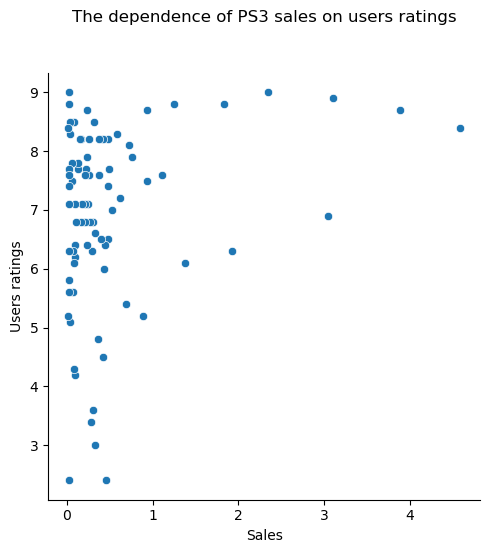

The correlation coefficient between user ratings of the 3DS platform and total sales is: 0.25


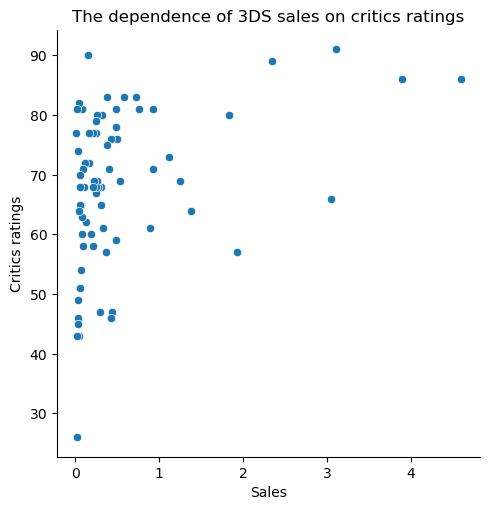

The correlation coefficient between critics ratings of the 3DS platform and total sales is: 0.36


In [104]:
games_3DS = games_current.query('platform == "3DS"')



sns.relplot(x='total_sales', y='user_score',data=games_3DS)
plt.title('The dependence of PS3 sales on users ratings' ,y=1.1)
plt.xlabel('Sales')
plt.ylabel('Users ratings')
plt.show()
print('The correlation coefficient between user ratings of the 3DS platform and total sales is:',\
      games_3DS['total_sales'].corr(games_3DS['user_score']).round(2))
sns.relplot(x='total_sales', y='critic_score',data=games_3DS)
plt.title('The dependence of 3DS sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics ratings')
plt.show()
print('The correlation coefficient between critics ratings of the 3DS platform and total sales is:',\
      games_3DS['total_sales'].corr(games_3DS['critic_score'].astype(float)).round(2))

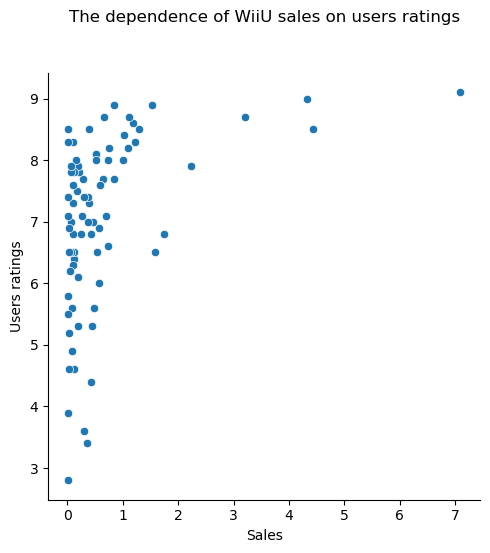

The correlation coefficient between user ratings of the WiiU platform and total sales is: 0.42


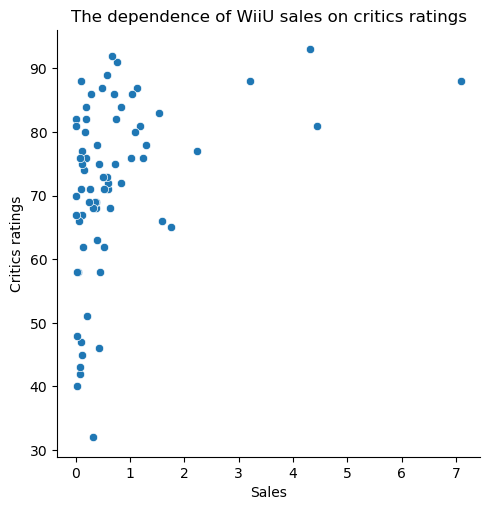

The correlation coefficient between critics ratings of the WiiU platform and total sales is: 0.38


In [105]:
games_WiiU = games_current.query('platform == "WiiU"')



sns.relplot(x='total_sales', y='user_score',data=games_WiiU)
plt.title('The dependence of WiiU sales on users ratings' ,y=1.1)
plt.xlabel('Sales')
plt.ylabel('Users ratings')
plt.show()
print('The correlation coefficient between user ratings of the WiiU platform and total sales is:',\
      games_WiiU['total_sales'].corr(games_WiiU['user_score']).round(2))
sns.relplot(x='total_sales', y='critic_score',data=games_WiiU)
plt.title('The dependence of WiiU sales on critics ratings')
plt.xlabel('Sales')
plt.ylabel('Critics ratings')
plt.show()
print('The correlation coefficient between critics ratings of the WiiU platform and total sales is:',\
      games_WiiU['total_sales'].corr(games_WiiU['critic_score'].astype(float)).round(2))

- Critic ratings have the same impact on game sales on all platforms (correlation between 0.3 and 0.4).

- On the other hand, user ratings do not affect sales on PS3, PS4, X360 and XOne, but start to have some significance on 3DS and WiiU, both from Nintendo, with correlations of 0.25 and 0.42 respectively.

### Let's look at the general distribution of games by genre.

Text(0.5, 1.1, 'Sales by genre')

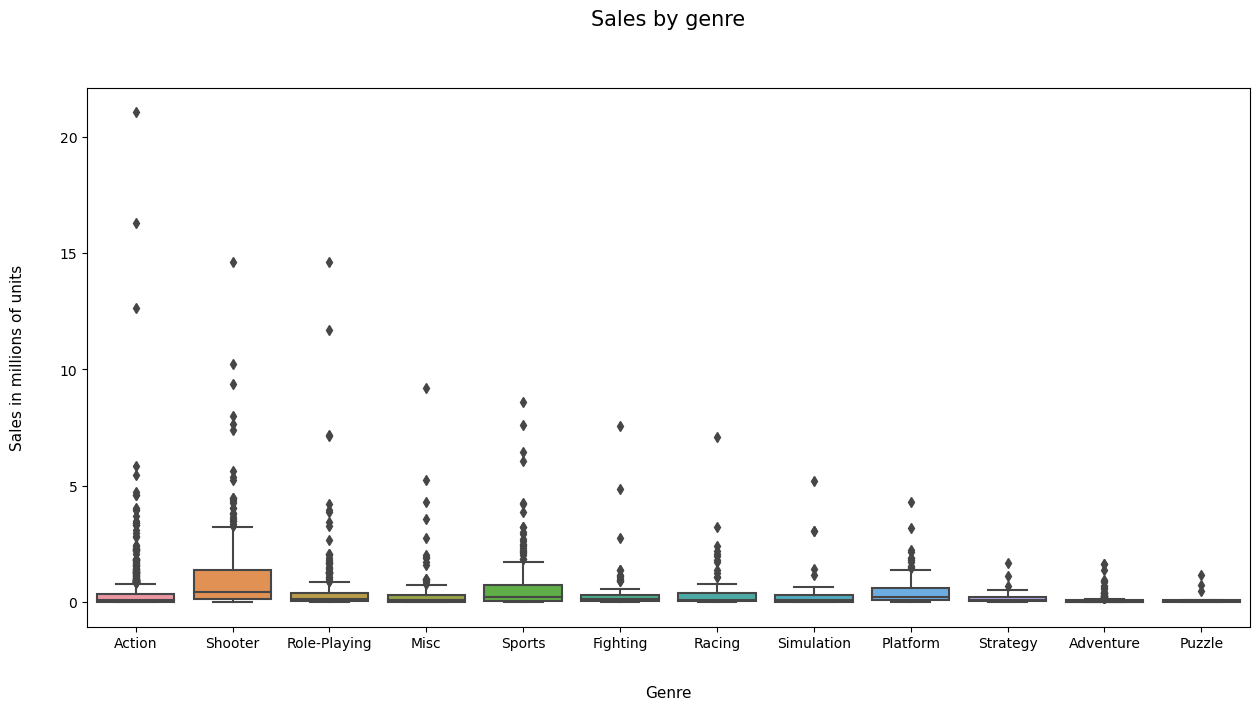

In [63]:
#genre_table= games_pot.pivot_table(index='genre', values='total_sales')
#genre_table.sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(15,10))
plt.figure(figsize=(15,7))
sns.boxplot(data=games_current, x = 'genre', y='total_sales')
plt.xlabel('Genre', labelpad = 25, fontsize= 11)
plt.ylabel('Sales in millions of units', labelpad = 25, fontsize= 11)
plt.title('Sales by genre', y=1.1, fontsize=15)

Text(0.5, 1.1, 'Sales by genre')

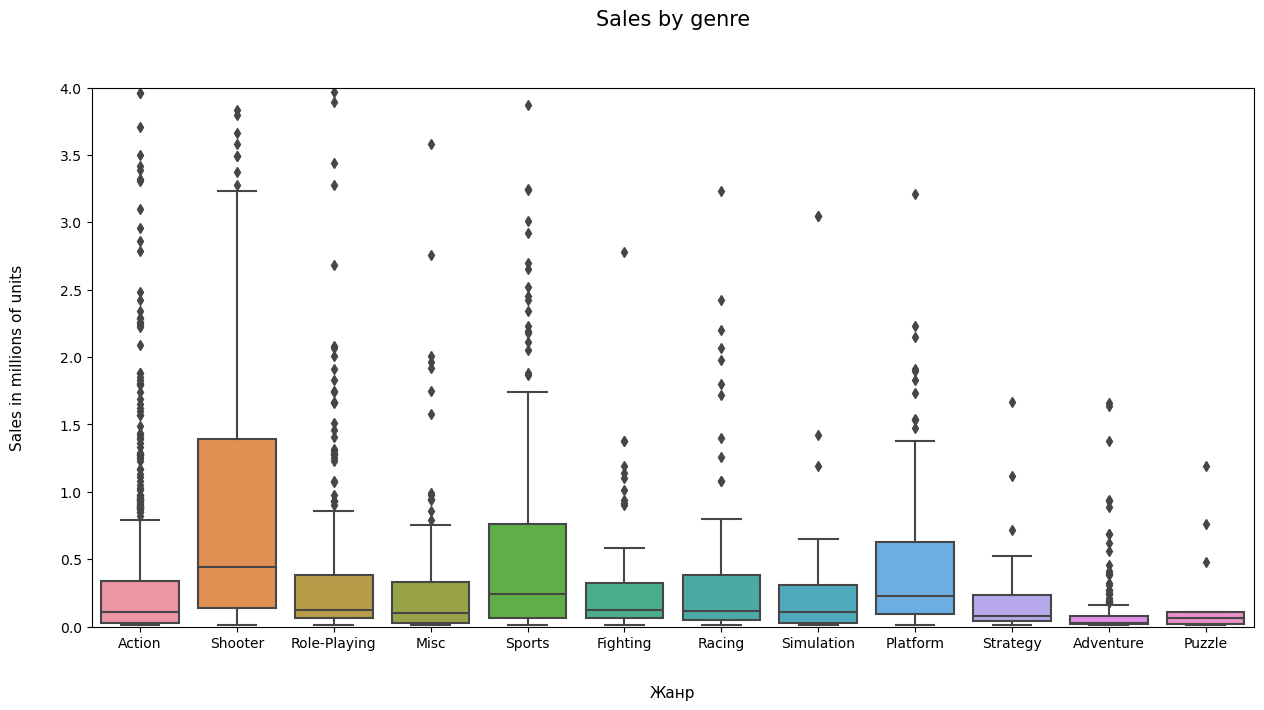

In [64]:
plt.figure(figsize=(15,7))
plt.ylim(0,4)
sns.boxplot(data=games_current, x = 'genre', y='total_sales')
plt.xlabel('Жанр', labelpad = 25, fontsize= 11)
plt.ylabel('Sales in millions of units', labelpad = 25, fontsize= 11)
plt.title('Sales by genre', y=1.1, fontsize=15)

- The **'Shooter'** genre is the dominant leader. Most video games in this genre sell **from half a million to a little over one and a half million**. The usual sales range for the **'Platform'** genre, which is next to the **'Sport' genre (ranging from 200,000 to 800,000)** in second place, goes **from 200,000 units to just over 800,000 units* *.

- Less popular genres are **'Puzzle'** (25,000-110,000 sales on average), **'Adventure'** (75% of sales in the range of 80,000-30,000 sales and 25% of sales in the range of 30,000-20,000 sales) and **'Strategy'** (75% of sales in the range of 220,000-80,000 sales and 25% of sales in the range of 80,000-40,000 sales). **It can be said that genres where solving puzzles and tasks that require mental effort from the player sell the least.**

- All other genres sold almost equally, with 75% of sales ranging from 327,000-106,000 sales and 25% of sales ranging from 106,000-38,000 sales on average.

- For every genre, there are games that can be considered bestsellers that stand out and sell much better than most games.

### Let's look at how many bestsellers there are in each genre. To do this, we will take video games whose sales exceed the limits of Q3+1.5*IQR of each genre:

In [65]:
shooter_seller = games_current.loc[(games_current['genre'] == 'Shooter') & (games_current['total_sales'] > 1.5), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Shooter":',shooter_seller['name'].count())

action_seller = games_current.loc[(games_current['genre'] == 'Action') & (games_current['total_sales'] > 0.29), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Action":',action_seller['name'].count())

role_seller = games_current.loc[(games_current['genre'] == 'Role-Playing') & (games_current['total_sales'] > 0.377), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Role-Playing":',role_seller['name'].count())


sports_seller = games_current.loc[(games_current['genre'] == 'Sports') & (games_current['total_sales'] > 0.7575), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Sports":',sports_seller['name'].count())


racing_seller = games_current.loc[(games_current['genre'] == 'Racing') & (games_current['total_sales'] > 0.380), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Racing":',racing_seller['name'].count())

fighting_seller = games_current.loc[(games_current['genre'] == 'Fighting') & (games_current['total_sales'] > 0.3225), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Fighting":',fighting_seller['name'].count())

platform_seller = games_current.loc[(games_current['genre'] == 'Platform') & (games_current['total_sales'] > 0.84), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Platform":',platform_seller['name'].count())

simulation_seller = games_current.loc[(games_current['genre'] == 'Simulation') & (games_current['total_sales'] > 0.305), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Simulation":',simulation_seller['name'].count())

misc_seller = games_current.loc[(games_current['genre'] == 'Misc') & (games_current['total_sales'] > 0.3375), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Misc":',misc_seller['name'].count())


puzzle_seller = games_current.loc[(games_current['genre'] == 'Puzzle') & (games_current['total_sales'] > 0.11), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Puzzle":',puzzle_seller['name'].count())

strategy_seller = games_current.loc[(games_current['genre'] == 'Strategy') & (games_current['total_sales'] > 0.22), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Strategy":',strategy_seller['name'].count())

adventure_seller = games_current.loc[(games_current['genre'] == 'Adventure') & (games_current['total_sales'] > 0.08), \
                               ['genre','name','total_sales']].reset_index(drop=True)

print(f'Number of bestsellers in the genre "Adventure"":',adventure_seller['name'].count())

all_seller = pd.concat([shooter_seller,
                        action_seller,
                        role_seller,
                        sports_seller,
                        racing_seller,
                        fighting_seller,
                        platform_seller,
                        simulation_seller, 
                        misc_seller,
                        puzzle_seller, 
                        strategy_seller,
                        adventure_seller], 
                        axis = 1
                        )




Number of bestsellers in the genre "Shooter": 46
Number of bestsellers in the genre "Action": 215
Number of bestsellers in the genre "Role-Playing": 75
Number of bestsellers in the genre "Sports": 54
Number of bestsellers in the genre "Racing": 22
Number of bestsellers in the genre "Fighting": 20
Number of bestsellers in the genre "Platform": 17
Number of bestsellers in the genre "Simulation": 16
Number of bestsellers in the genre "Misc": 38
Number of bestsellers in the genre "Puzzle": 3
Number of bestsellers in the genre "Strategy": 15
Number of bestsellers in the genre "Adventure"": 56


### Top 10 bestsellers by genre:

In [66]:
all_seller.head(10)

,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales,genre,name,total_sales
0,Shooter,call of duty: black ops 3,14.63,Action,grand theft auto v,21.05,Role-Playing,pokemon x/pokemon y,14.60,Sports,fifa 16,8.58,Racing,mario kart 8,7.09,Fighting,super smash bros. for wii u and 3ds,7.55,Platform,super mario 3d world,4.32,Simulation,tomodachi life,5.22,Misc,minecraft,9.18,Puzzle,captain toad: treasure tracker,1.19,Strategy,starcraft ii: heart of the swarm,1.67,Adventure,until dawn,1.66
1,Shooter,call of duty: ghosts,10.24,Action,grand theft auto v,16.27,Role-Playing,pokemon omega ruby/pokemon alpha sapphire,11.68,Sports,fifa 17,7.60,Racing,gran turismo 6,3.23,Fighting,super smash bros. for wii u and 3ds,4.87,Platform,super mario maker,3.21,Simulation,animal crossing: happy home designer,3.05,Misc,minecraft,5.27,Puzzle,professor layton and the azran legacy,0.76,Strategy,pikmin 3,1.12,Adventure,beyond: two souls,1.64
2,Shooter,call of duty: ghosts,9.36,Action,grand theft auto v,12.62,Role-Playing,fallout 4,7.17,Sports,fifa 14,6.46,Racing,need for speed (2015),2.42,Fighting,mortal kombat x,2.78,Platform,new super luigi u,2.23,Simulation,the sims 4,3.05,Misc,minecraft,4.32,Puzzle,puzzle & dragons z + super mario bros. edition,0.48,Strategy,total war: rome ii,0.72,Adventure,rise of the tomb raider,1.38
3,Shooter,star wars battlefront (2015),7.98,Action,the last of us,5.86,Role-Playing,pokemon sun/moon,7.14,Sports,fifa 15,6.08,Racing,forza motorsport 5,2.20,Fighting,injustice: gods among us,1.38,Platform,skylanders swap force,2.15,Simulation,simcity (2013),1.42,Misc,just dance 2014,3.58,NaN,NaN,NaN,Strategy,starcraft ii: legacy of the void,0.52,Adventure,rise of the tomb raider,0.94
4,Shooter,call of duty: advanced warfare,7.66,Action,grand theft auto v,5.47,Role-Playing,fallout 4,4.22,Sports,fifa 15,4.28,Racing,driveclub,2.07,Fighting,mortal kombat x,1.38,Platform,littlebigplanet 3,1.91,Simulation,farming simulator 2015,1.19,Misc,minecraft,2.76,NaN,NaN,NaN,Strategy,sid meier's civilization: beyond earth,0.36,Adventure,disney magical world,0.93
5,Shooter,call of duty: black ops 3,7.39,Action,the last of us,4.72,Role-Playing,the witcher 3: wild hunt,3.97,Sports,fifa 14,4.22,Racing,need for speed rivals,1.98,Fighting,injustice: gods among us,1.19,Platform,donkey kong country returns,1.90,Simulation,farming simulator 17,0.65,Misc,just dance 2015,2.01,NaN,NaN,NaN,Strategy,company of heroes 2,0.35,Adventure,minecraft: story mode,0.89
6,Shooter,destiny,5.64,Action,uncharted: the nathan drake collection,4.62,Role-Playing,monster hunter 4 ultimate,3.89,Sports,nba 2k16,3.87,Racing,forza motorsport 6,1.80,Fighting,naruto shippuden: ultimate ninja storm 4,1.14,Platform,kirby: triple deluxe,1.83,Simulation,football manager 2015,0.47,Misc,minecraft,1.96,NaN,NaN,NaN,Strategy,angry birds star wars,0.33,Adventure,minecraft: story mode,0.69
7,Shooter,uncharted 4: a thief's end,5.39,Action,luigi's mansion: dark moon,4.59,Role-Playing,monster hunter 4,3.44,Sports,fifa 16,3.25,Racing,the crew,1.72,Fighting,dragon ball: xenoverse,1.10,Platform,knack,1.73,Simulation,story of seasons,0.42,Misc,mario party: island tour,1.92,NaN,NaN,NaN,Strategy,dragon ball heroes: ultimate mission 2,0.32,Adventure,minecraft: story mode,0.69
8,Shooter,call of duty: advanced warfare,5.26,Action,watch dogs,4.05,Role-Playing,yokai watch 2 ganso/honke,3.28,Sports,madden nfl 16,3.24,Racing,forza horizon 2,1.40,Fighting,pokken tournament,1.01,Platform,ratchet & clank (2016),1.54,Simulation,farming simulator 17,0.42,Misc,wii party u,1.75,NaN,NaN,NaN,Strategy,angry birds star wars,0.29,Adventure,tearaway,0.62
9,Shooter,halo 5: guardians,4.49,Action,assassin's creed: unity,3.96,Role-Playing,yokai watch 2 shinuchi,2.68,Sports,fifa 14,3.01,Racing,need for speed rivals,1.26,Fighting,naruto shi

A note:
- An advertising campaign can be planned not only by platform, genre, critics' ratings or distribution of sales by region, some part of the budget can be allocated to advertising super popular games.

# Drawing up a user profile for each region

### Most popular platforms (top 5) for each region (EU, NA, JP):

In [67]:
platform_per_region = games_current.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales'], aggfunc ='sum')
platform_per_region



,eu_sales,jp_sales,na_sales
platform,,,
3DS,31.17,67.86,39.04
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.15,18.66,5.15
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


In [68]:
eu_platforms = games_current.pivot_table(index='platform', values=['eu_sales'], aggfunc ='sum')
eu_platforms = eu_platforms.sort_values(by='eu_sales', ascending = False)
eu_other = pd.DataFrame({
    "eu_sales": eu_platforms['eu_sales'].sum() - eu_platforms['eu_sales'][:5].sum()}, index=['Other'])
    
top5_eu = eu_platforms[:5]

eu_platforms = top5_eu.append(eu_other)
eu_platforms = eu_platforms.rename(columns={'eu_sales':'EU Sales'})

display(eu_platforms)

,EU Sales
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,31.17
Other,58.31


In [69]:
jp_platforms = games_current.pivot_table(index='platform', values=['jp_sales'], aggfunc ='sum')
jp_platforms = jp_platforms.sort_values(by='jp_sales', ascending = False)
jp_other = pd.DataFrame({
    "jp_sales": jp_platforms['jp_sales'].sum() - jp_platforms['jp_sales'][:5].sum()}, index=['Other'])
    
top5_jp = jp_platforms[:5]

jp_platforms = top5_jp.append(jp_other)
jp_platforms = jp_platforms.rename(columns={'jp_sales':'JP Sales'})

display(jp_platforms)

,JP Sales
3DS,67.86
PS3,23.35
PSV,18.66
PS4,15.96
WiiU,10.88
Other,4.19


In [70]:
na_platforms = games_current.pivot_table(index='platform', values=['na_sales'], aggfunc ='sum')
na_platforms = na_platforms.sort_values(by='na_sales', ascending = False)
na_other = pd.DataFrame({
    "na_sales": na_platforms['na_sales'].sum() - na_platforms['na_sales'][:5].sum()}, index=['Other'])
    
top5_na = na_platforms[:5]

na_platforms = top5_na.append(na_other)
na_platforms = na_platforms.rename(columns={'na_sales':'NA Sales'})

display(na_platforms)

,NA Sales
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,39.04
Other,52.60


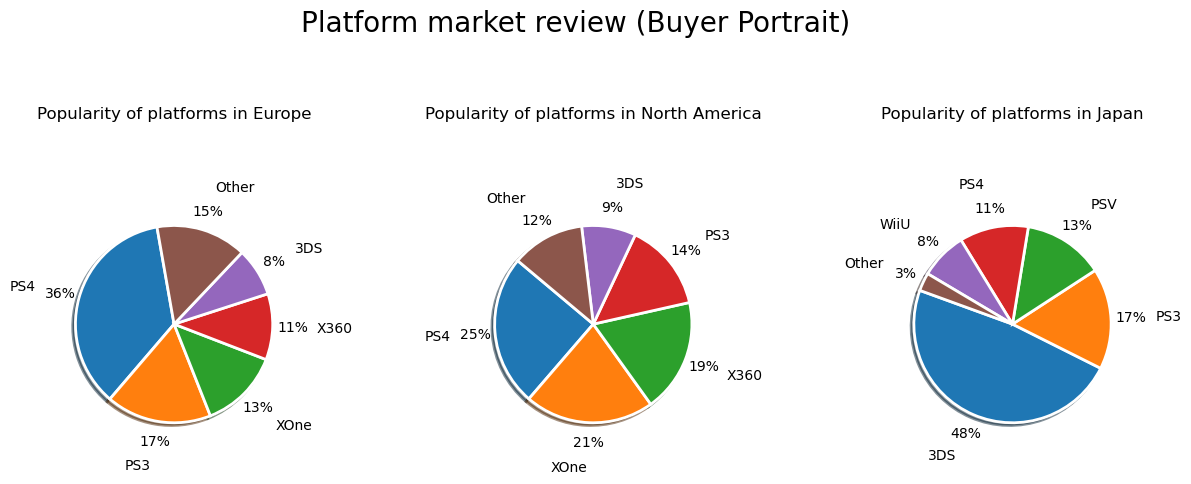

In [71]:
plt.figure(figsize=(14,14))
plt.suptitle('Platform market review (Buyer Portrait)', fontsize = 20, y=0.72)


plt.subplot(1,3,1)
plt.pie(eu_platforms['EU Sales'],
        autopct = '%.0f%%',
        explode = (0,0,0,0,0,0),
        shadow = True,
        rotatelabels = False,
        labels = eu_platforms.index,
        pctdistance = 1.2,
        labeldistance = 1.45,
        startangle = 100,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True},
        
       )

plt.title('Popularity of platforms in Europe', y = 1.3)



plt.subplot(1,3,2)
plt.pie(na_platforms['NA Sales'],
        autopct = '%.0f%%',
        explode = (0,0,0,0,0,0),
        shadow = True,
        rotatelabels = False,
        labels = na_platforms.index,
        pctdistance = 1.2,
        labeldistance = 1.45,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True},
        startangle = 140
        )

plt.title('Popularity of platforms in North America', y = 1.3)


plt.subplot(1,3,3)
plt.pie(jp_platforms['JP Sales'],
        autopct = '%.0f%%',
        explode = (0,0,0,0,0,0),
        shadow = True,
        rotatelabels = False,
        labels = jp_platforms.index,
        pctdistance = 1.2,
        labeldistance = 1.45,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True},
        startangle = 160
        )
plt.title('Popularity of platforms in Japan', y = 1.3)


plt.subplots_adjust(wspace = 0.7)

- In **Japan** , 3DS clearly leads with a 48% of the market sales.

     - The following platforms follow:

         - 2.PS3 (17%)
         - 3.PSV (13%)
         - 4.PS4 (11%)
         - 5.WiiU (8%)
        
     
     
     

- In **North America** , PS4 leads (25%)

     - Then the following platforms follow:

        - 2.XOne (21%)
        - 3.X360 (19%)
        - 4.PS3 (14%)
        - 5.3DS (9%)
       
- In **Europe**, PS4 leads with a 36% of the market sales.

     - The following platforms follow:

        - 2.PS3 (17%)
        - 3.XOne (13%)
        - 4.X360 (11%)
        - 5.3DS (8%)

- Japan stays loyal to their national product, Sony and Nintendo platforms are the most popular.

- In Europe and North America, everything is very similar, unlike the market share between PS4 and Xone:
     - In America, they are almost equal, but in Europe PS4 dominates.

### The most popular genres (TOP-5) for each region (EU, NA, JP):

In [72]:
genre_per_region = games_current.pivot_table(index='genre', values=['na_sales','eu_sales', 'jp_sales'], aggfunc ='sum')
genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.32,40.49,126.23
Adventure,8.25,5.82,7.22
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,13.04
Role-Playing,37.02,51.14,46.51
Shooter,87.88,6.61,109.78


In [73]:
eu_genre = games_current.pivot_table(index='genre', values=['eu_sales'], aggfunc ='sum')
eu_genre = eu_genre.sort_values(by='eu_sales', ascending = False)
eu_genother = pd.DataFrame({
    "eu_sales": eu_genre['eu_sales'].sum() - eu_genre['eu_sales'][:5].sum()}, index=['Other'])
    
top5_eugen = eu_genre[:5]

eu_genre = top5_eugen.append(eu_genother)
eu_genre = eu_genre.rename(columns={'eu_sales':'EU Sales'})

display(eu_genre)

,EU Sales
Action,118.32
Shooter,87.88
Sports,60.52
Role-Playing,37.02
Racing,20.19
Other,68.56


In [74]:
na_genre = games_current.pivot_table(index='genre', values=['na_sales'], aggfunc ='sum')
na_genre = na_genre.sort_values(by='na_sales', ascending = False)
na_genother = pd.DataFrame({
    "na_sales": na_genre['na_sales'].sum() - na_genre['na_sales'][:5].sum()}, index=['Other'])
    
top5_nagen = na_genre[:5]

na_genre = top5_nagen.append(na_genother)
na_genre = na_genre.rename(columns={'na_sales':'NA Sales'})

display(na_genre)

,NA Sales
Action,126.23
Shooter,109.78
Sports,65.27
Role-Playing,46.51
Misc,27.49
Other,63.38


In [75]:
jp_genre = games_current.pivot_table(index='genre', values=['jp_sales'], aggfunc ='sum')
jp_genre = jp_genre.sort_values(by='jp_sales', ascending = False)
jp_genother = pd.DataFrame({
    "jp_sales": jp_genre['jp_sales'].sum() - jp_genre['jp_sales'][:5].sum()}, index=['Other'])
    
top5_jpgen = jp_genre[:5]

jp_genre = top5_jpgen.append(jp_genother)
jp_genre = jp_genre.rename(columns={'jp_sales':'JP Sales'})

display(jp_genre)

,JP Sales
Role-Playing,51.14
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Other,25.81


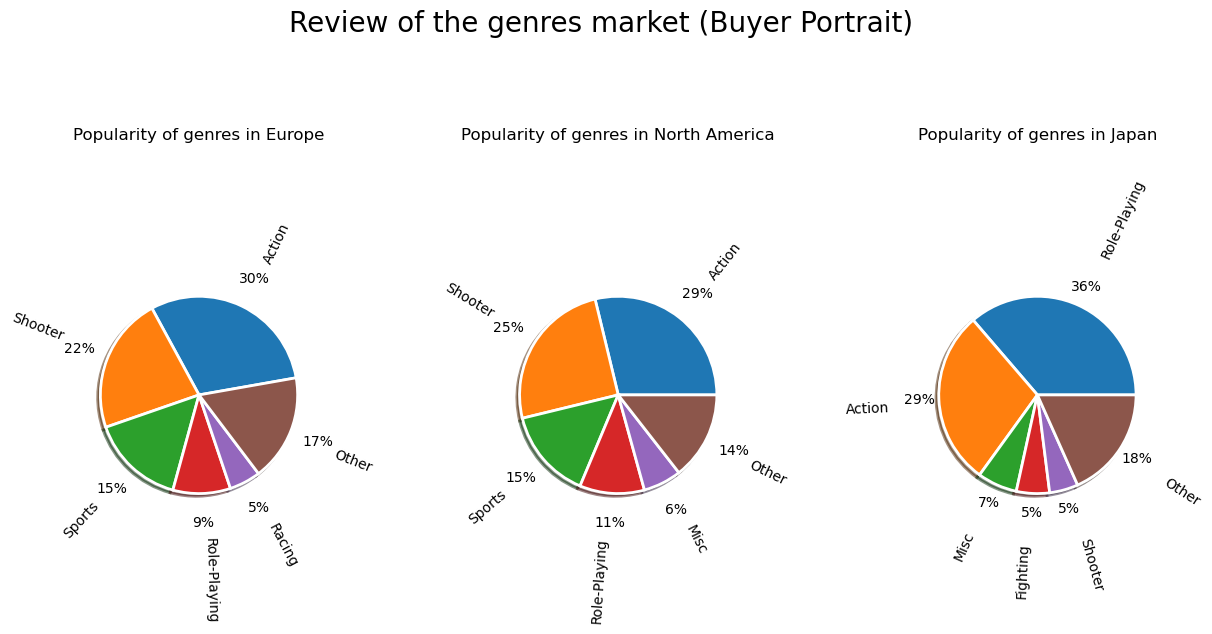

In [76]:
plt.figure(figsize=(14,14))
plt.suptitle('Review of the genres market (Buyer Portrait)', fontsize = 20, y=0.77)


plt.subplot(1,3,1)
plt.pie(eu_genre['EU Sales'],
        autopct = '%.0f%%',
        shadow = True,
        rotatelabels = True,
        labels = eu_genre.index,
        pctdistance = 1.3,
        labeldistance = 1.45,
        startangle = 10,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True}
       )

plt.title('Popularity of genres in Europe', y = 1.5)



plt.subplot(1,3,2)
plt.pie(na_genre['NA Sales'],
        autopct = '%.0f%%',
        shadow = True,
        rotatelabels = True,
        labels = na_genre.index,
        pctdistance = 1.3,
        labeldistance = 1.45,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True})

plt.title('Popularity of genres in North America', y = 1.5)


plt.subplot(1,3,3)
plt.pie(jp_genre['JP Sales'],
        autopct = '%.0f%%',
        shadow = True,
        rotatelabels = True,
        labels = jp_genre.index,
        pctdistance = 1.2,
        labeldistance = 1.50,
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 2,
                      'antialiased': True}
        )
plt.title('Popularity of genres in Japan', y = 1.5)


plt.subplots_adjust(wspace = 0.7)


- In **Japan** The most popular genres are:

         - 1. Role-Playing 36%
         - 2. Action 29%
         - 3. MISC 7%
         - 4. Fighting 5%
         - 5. Shooter 5%


- In **Europe** The most popular genres are:

         - 1. Action 30%
         - 2. Shooter 22%
         - 3. Sports 15%
         - 4. Role-Playing 9%
         - 5. Racing 5%
        
- In **North America** The most popular genres are:

         - 1. Action 29%
         - 2. Shooter 25%
         - 3. Sports 15%
         - 4. Role-Playing 11%
         - 5. MISC 6%

- Europe and North America differ only in that the fifth preference for the first one is 'Racing', and for the second - 'Misc'.

- Where there is a huge difference is in the 'Sport' and 'Shooter' genres, which are very popular in Europe and North America, but quite the opposite in Japan.

- A genre that is equally very popular in all three is 'Action'.

- On the other hand, in Japan, the most popular genre is 'Role-Playing', where it far exceeds the market share in Europe and North America.

- In other genres there is not much difference between them.

- Also, looking at the charts, we see that America and Europe are much larger markets than Japan in terms of sales numbers.

### Impact of ESRB rating on sales by region:

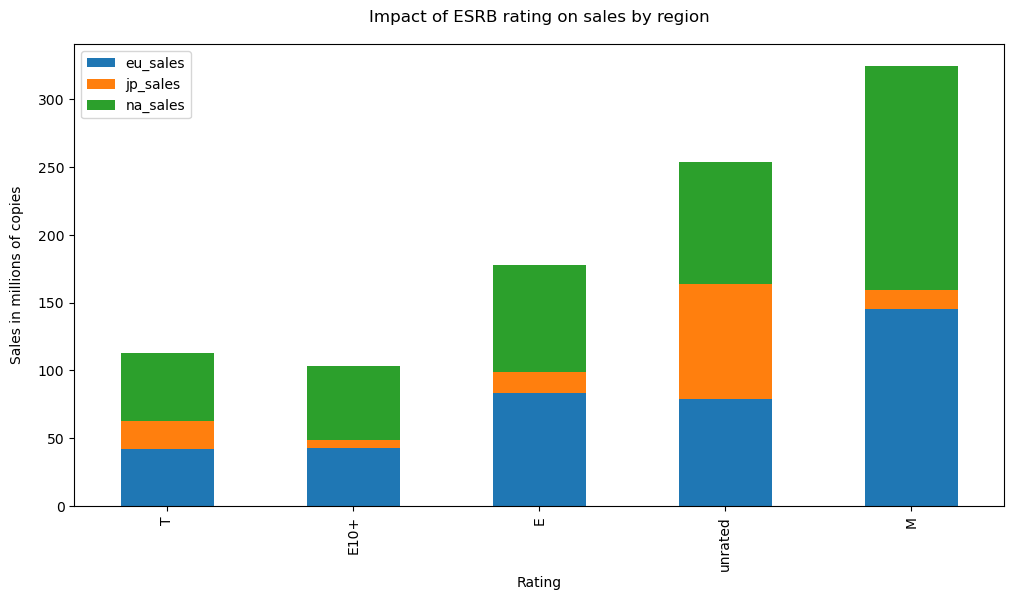

In [79]:
rsr = games_current.pivot_table(index='rating', values=['eu_sales','na_sales','jp_sales'], aggfunc ='sum')
rsr.sort_values(by=['na_sales','eu_sales', 'jp_sales']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Sales in millions of copies', labelpad=10)
plt.xlabel('Rating')
plt.title('Impact of ESRB rating on sales by region', y = 1.03)
plt.show()

In [80]:
rsr.apply(lambda x: x / x.sum(), axis=0).style.format('{:.0%}')

,eu_sales,jp_sales,na_sales
rating,,,
E,21%,11%,18%
E10+,11%,4%,12%
M,37%,10%,38%
T,11%,15%,11%
unrated,20%,60%,20%


In Europe and North America, the best-selling ratings are M, E and Unrated. In Japan - Unrated, with great superiority over the rest.

**Europe**:
1. M (37%)
2. E (21%)
3. Unrated (20%)
4. E10+ / T (11%)

**Japan**:
1. Unrated (60%)
2. T (15%)
3. E (11%)
4. M (10%)
5. E10+ (4%)

**North America**:
1. M (38%)
2. Unrated (20%)
3. E (18%)
4. E10+ (12%)
5. T (11%)

# Testing hypotheses

### Hypothesis: Average user ratings for Xbox One and PC platforms are the same

In [81]:
rating_xone = games_current.loc[games_current['platform'] == 'XOne', 'user_score'].dropna()
rating_pc = games_current.loc[games_current['platform'] == 'PC', 'user_score'].dropna()

In [82]:
rating_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [83]:
rating_xone = pd.DataFrame(rating_xone)
rating_pc = pd.DataFrame(rating_pc)

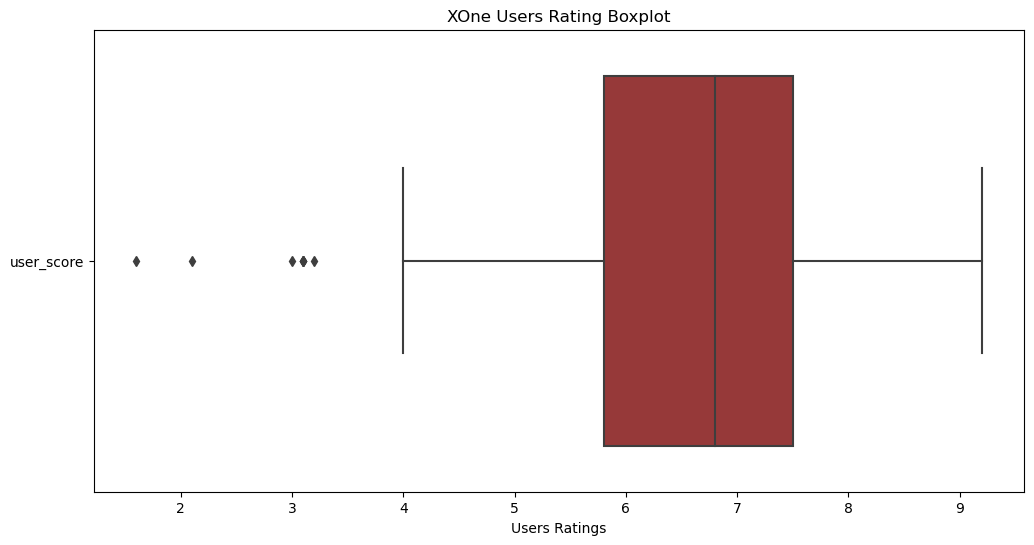

In [84]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
plt.title('XOne Users Rating Boxplot')
sns.boxplot(rating_xone, orient = 'h', color = 'brown')
plt.xlabel('Users Ratings')
plt.show()

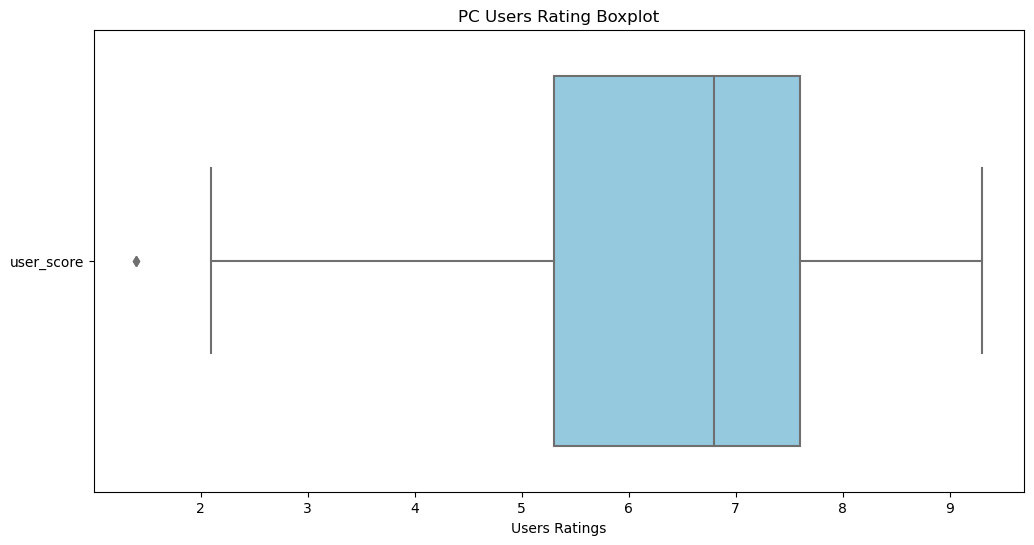

In [85]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
plt.title('PC Users Rating Boxplot')
sns.boxplot(rating_pc, orient = 'h', color = 'skyblue')
plt.xlabel('Users Ratings')
plt.show()

In [86]:
rating_pc.describe()

,user_score
count,155.000000
mean,6.269677
std,1.742381
min,1.400000
25%,5.300000
50%,6.800000
75%,7.600000
max,9.300000


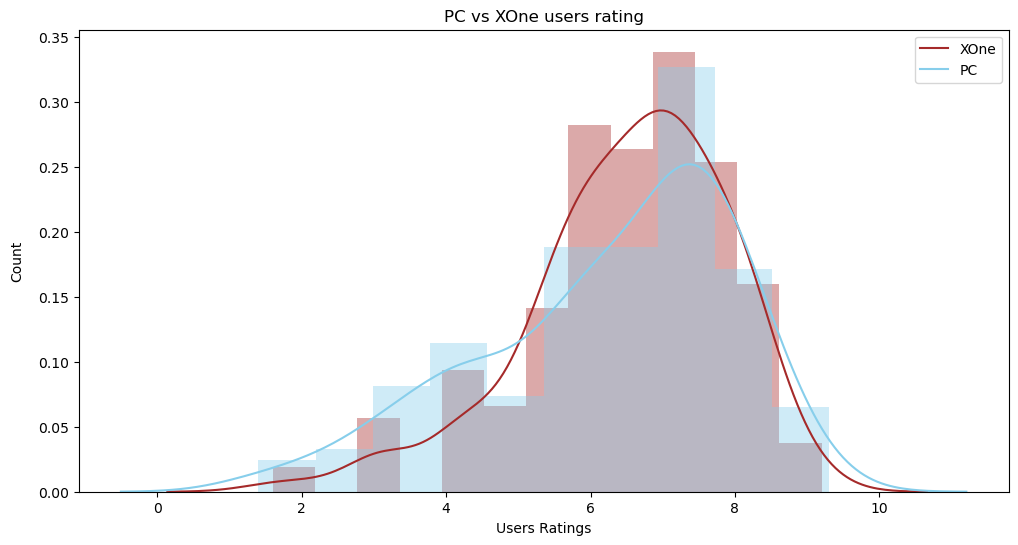

In [87]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
sns.distplot(rating_xone, color = 'brown')
sns.distplot(rating_pc, color = 'skyblue')
plt.legend(['XOne','PC'])
plt.title('PC vs XOne users rating')
plt.xlabel('Users Ratings')
plt.ylabel('Count', labelpad=10)
plt.show()

- The distribution appears to be the same, but rating_pc appears to have missing values.

In [88]:
 len(rating_xone) / len(rating_pc)

1.1741935483870967

- Indeed, the rating_xone sample is 1.17 times larger.

In [89]:
# checking dispersions
print(rating_xone.std())
print(rating_pc.std())

user_score    1.380941
dtype: float64
user_score    1.742381
dtype: float64


- Dispersions are different.

- Taking into account that the median and mean are almost the same, and the distribution of values seems to be the same with the difference that rating_xone has a 17% larger sample, we can say that the average user ratings for both platforms will be the same.

Let's set the main and alternative hypotheses:

- **H0: Average user ratings are the same**
- **H1: Average user ratings are NOT the same**
 


- We will calculate the p-value using ttest from the scipy library to compare the means of two samples.




- We know that the dispersion is not equivalent, so we will specify 'equal_var=False'. (equal_var=False)




- If the **p-value** is **less** than the selected significance level (alpha), then **we will reject the null hypothesis**.
- If the **p-value** is **greater** than the selected significance level (alpha), it will mean that **it was not possible to reject the null hypothesis**.

In [90]:
results = st.ttest_ind(
rating_xone,
rating_pc, equal_var = False)
print('p-значение: ', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-значение:  [0.14759594]
Failed to reject the null hypothesis


- **st.ttest_ind()** is a method that returns statistics
differences between the means of two samples.

- **p-value** — the significance level at which they are located
from each other (probability of error if the null hypothesis is rejected).
     - The lower the p-value, the greater the statistical significance of the observed difference.
     - a p-value of **0.05** or lower is usually considered statistically significant, so we have indicated that if the p-value < (alpha = 0.05) then it will mean that H0 is not rejected (the data suggests that samples may be are equal).
    
    
In this case, the p-value was found to be greater than 0.05, meaning that there is no indication that the values differed significantly.

Interpretation of the result:
- The resulting p-value indicates that although the average check of people coming from different channels is not the same, with a probability of almost 19% such or greater difference can be obtained by chance. This is clearly too high a probability to conclude that there is a significant difference between the average checks.

- And if the p-value is equal to 0.9999, then this means that with a probability of almost 100% such a difference can be obtained by chance - that is, almost never.

### Hypothesis: Average user ratings for the Action and Sports genres are different.

In [91]:
rating_action = pd.DataFrame(games_current.loc[games_current['genre'] == 'Action', 'user_score'].dropna())
rating_sports = pd.DataFrame(games_current.loc[games_current['genre'] == 'Sports', 'user_score'].dropna())

In [92]:
rating_action.describe()

,user_score
count,390.000000
mean,6.836667
std,1.328572
min,2.000000
25%,6.300000
50%,7.100000
75%,7.775000
max,9.100000


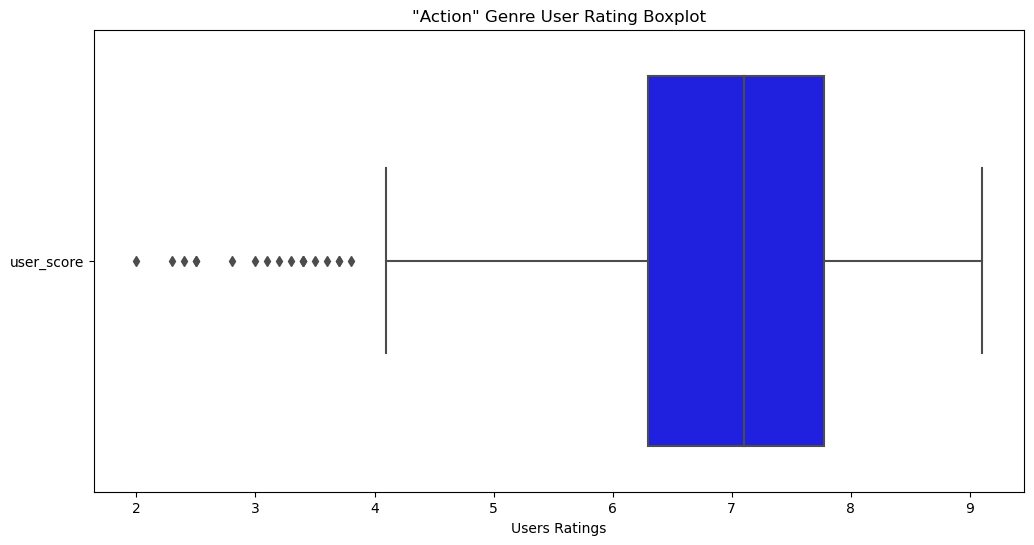

In [93]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
plt.title('"Action" Genre User Rating Boxplot')
sns.boxplot(rating_action, orient = 'h', color = 'blue')
plt.xlabel('Users Ratings')
plt.show()

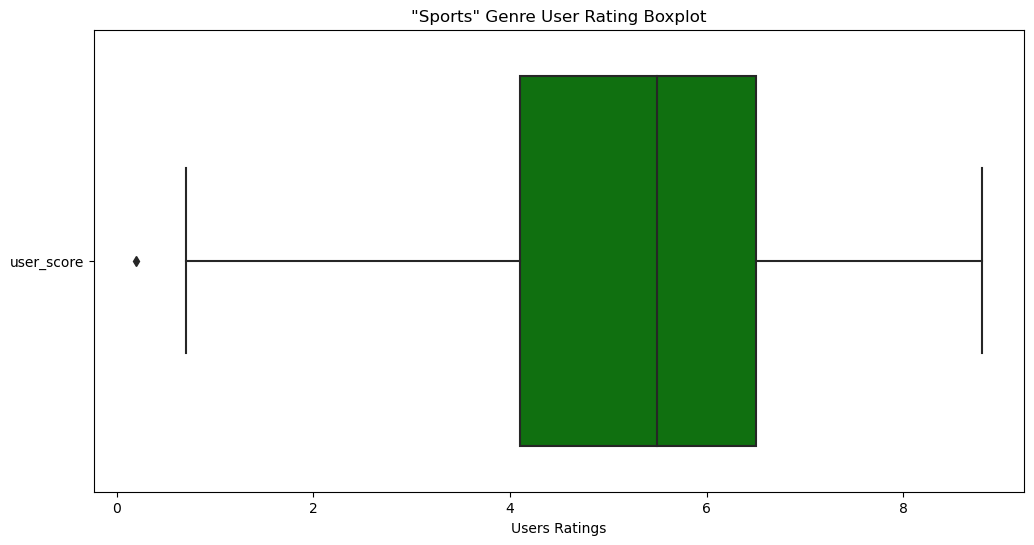

In [94]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
plt.title('"Sports" Genre User Rating Boxplot')
sns.boxplot(rating_sports, orient = 'h', color = 'Green')
plt.xlabel('Users Ratings')
plt.show()

In [95]:
rating_sports.describe()

,user_score
count,160.000000
mean,5.238125
std,1.783427
min,0.200000
25%,4.100000
50%,5.500000
75%,6.500000
max,8.800000


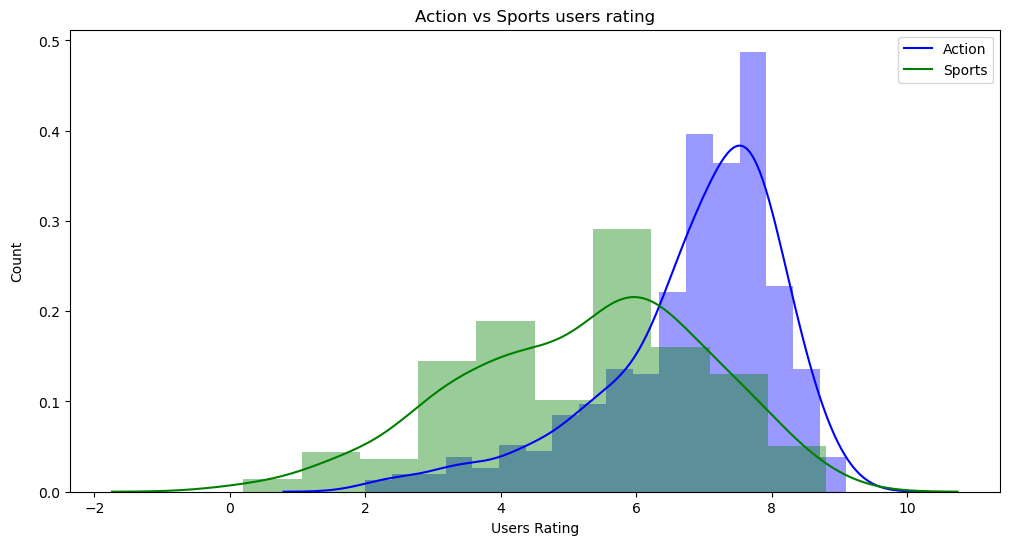

In [96]:
warnings.simplefilter('ignore')
plt.figure(figsize=(12,6))
sns.distplot(rating_action, color = 'Blue')
sns.distplot(rating_sports, color = 'Green')
plt.legend(['Action','Sports'])
plt.title('Action vs Sports users rating')
plt.xlabel('Users Rating')
plt.ylabel('Count', labelpad=10)
plt.show()

In [97]:
# dispersion:
print('Sports Dispersion:',rating_sports.std())
print('Action Dispersion:',rating_action.std())

Sports Dispersion: user_score    1.783427
dtype: float64
Action Dispersion: user_score    1.328572
dtype: float64


In [98]:
len(rating_action) / len(rating_sports)  

2.4375

- The rating_action sample is 2.83 times larger.

- Given that the median and mean are NOT the same, and the distribution of values in each is different, it can be assumed that the average user ratings for both platforms will be different.

Let's pset the main and alternative hypotheses:

- **H0: Average user ratings are the same**
- **H1: Average user ratings vary**
 


- We will calculate the p-value using ttest from the scipy library to compare the means of two samples.




- We know that the dispersion is not equivalent, so we will specify 'equal_var=False'.




- If the **p-value** is **less** than the selected significance level (alpha), then **we will reject the null hypothesis**.
- If the **p-value** is **greater** than the selected significance level (alpha), it will mean that **it was not possible to reject the null hypothesis**.

In [99]:
results = st.ttest_ind(
rating_action,
rating_sports, equal_var = False)
print('p-value: ', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value:  [1.47118316e-20]
We reject the null hypothesis


- The difference statistics are too large to assume that the average of the samples is the same.

# Conclusion

Based on historical game sales data for 2016, we needed to identify patterns that determine the success of games.

During the study, we made the following conclusions:



- The most **potentially profitable platforms** are `PS4` and `XOne`. For some time, games for the `3DS`, `WiiU`, and `PSV` platforms will still be relevant. As for the `PC`, it has always been there, it doesn’t sell as much as others, but it always remains.




- If we divide the **popularity of platforms by market**, then:
     - In **Japan**, they are true to their own: `Sony` and `Nintendo` platforms are the most popular.
     - In **Europe** and **North America**, everything is very similar, in contrast to the market share between `PS4` and `XOne`:
          - In **America**, they are almost equal, but in **Europe**, `PS4` dominates.
     
     
     

- From **genres**, it is recommended to choose games in the genre of `Action`, `Shooters` and `Sports` for **Europe** and **North America** and `Role-Playing` and `Action`for the **Japanese market**.



- **Age rating**:
     - In **Europe** and **North America**, the most sold ratings are `M`, `E` and `Unrated`.
     - In **Japan**: `Unrated` tops, with great superiority over others.
    


- **Critic ratings** have the same impact on game sales on all platforms (correlation between 0.3 and 0.4.).

- **User ratings** have no impact on sales on `PS3`, `PS4`, `X360` and `XOne`, but start to have some impact on `3DS` and `WiiU`, both from `Nintendo`, with correlations of 0.25 and 0.42 respectively.


- We also tested two hypotheses stated at the very beginning of the study. As a result:

     - **average user ratings** for `Xbox One` and `PC` have big probability to be **identical** (the difference in average values is statistically insignificant).

     - **average user ratings** for the `Action` and `Sports` genres have big probability to be **different** (the difference in average values is statistically significant).